In [19]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import time
import progressbar as pbar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from sklearn.decomposition import PCA
import nucleus
from sklearn.metrics import classification_report
from tqdm import tqdm
tf.__version__

'2.0.0-beta1'

In [2]:
df = pd.read_csv('../Cs137data/re_bp_SetData.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,0,97.0,101.0,77.0,74.0,90.0,88.0,30.0,29.0,241.0,...,37.0,33.0,195.0,196.0,34.0,31.0,42.0,44.0,77.0,0.0
1,1,79.0,74.0,141.0,143.0,235.0,237.0,32.0,31.0,68.0,...,90.0,88.0,31.0,31.0,58.0,60.0,28.0,27.0,26.0,0.0
2,2,82.0,85.0,51.0,51.0,52.0,53.0,119.0,119.0,152.0,...,38.0,67.0,66.0,134.0,134.0,32.0,33.0,98.0,100.0,0.0
3,3,46.0,49.0,30.0,29.0,85.0,85.0,62.0,62.0,245.0,...,34.0,103.0,101.0,52.0,52.0,82.0,78.0,46.0,46.0,0.0
4,4,50.0,50.0,232.0,232.0,30.0,36.0,180.0,181.0,88.0,...,53.0,58.0,45.0,43.0,67.0,67.0,64.0,63.0,28.0,0.0


In [39]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,0,97.0,101.0,77.0,74.0,90.0,88.0,30.0,29.0,241.0,...,37.0,33.0,195.0,196.0,34.0,31.0,42.0,44.0,77.0,0.0
1,1,79.0,74.0,141.0,143.0,235.0,237.0,32.0,31.0,68.0,...,90.0,88.0,31.0,31.0,58.0,60.0,28.0,27.0,26.0,0.0
2,2,82.0,85.0,51.0,51.0,52.0,53.0,119.0,119.0,152.0,...,38.0,67.0,66.0,134.0,134.0,32.0,33.0,98.0,100.0,0.0
3,3,46.0,49.0,30.0,29.0,85.0,85.0,62.0,62.0,245.0,...,34.0,103.0,101.0,52.0,52.0,82.0,78.0,46.0,46.0,0.0
4,4,50.0,50.0,232.0,232.0,30.0,36.0,180.0,181.0,88.0,...,53.0,58.0,45.0,43.0,67.0,67.0,64.0,63.0,28.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7416,7416,134.0,135.0,42.0,43.0,35.0,35.0,30.0,18.0,42.0,...,183.0,184.0,218.0,217.0,21.0,22.0,199.0,156.0,157.0,3.0
7417,7417,77.0,77.0,111.0,111.0,91.0,93.0,220.0,56.0,57.0,...,47.0,90.0,82.0,81.0,63.0,63.0,118.0,55.0,55.0,3.0
7418,7418,192.0,195.0,22.0,121.0,64.0,20.0,45.0,47.0,198.0,...,44.0,38.0,38.0,55.0,56.0,191.0,189.0,222.0,225.0,3.0
7419,7419,172.0,170.0,19.0,21.0,111.0,113.0,122.0,120.0,99.0,...,196.0,89.0,88.0,30.0,31.0,163.0,164.0,189.0,188.0,3.0


In [3]:
X = df.values[:, 1: 5001]
Y = df.values[:, -1]

# 删除本底数据，得到新的训练数据
X1 = np.delete(X, np.where(Y == 0)[0], axis=0)
Y1 = np.delete(Y, np.where(Y == 0)[0], axis=0)
X1.shape, Y1.shape

((7317, 5000), (7317,))

In [4]:
Y2 = Y1[:] - 1
Y2

array([0., 0., 0., ..., 2., 2., 2.])

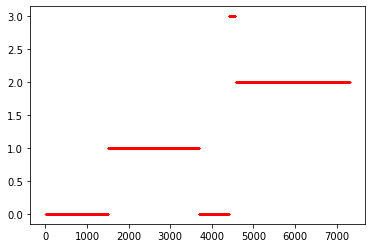

In [44]:
plt.scatter(range(Y2.shape[0]), Y2, s=0.2, c='r')
plt.show()

In [3]:
dataSet = df.values[:, 1: 5001]
dataSet.shape, dataSet

((6633, 5000), array([[ 39.,  41.,  36., ...,  81.,  82.,  32.],
        [ 33.,  20.,  28., ..., 111., 109.,  84.],
        [ 83.,  41.,  38., ...,  37.,  48.,  51.],
        ...,
        [ 20.,  20., 111., ...,  46.,  45., 109.],
        [112.,  17., 142., ...,  54.,  28.,  30.],
        [114., 114., 113., ..., 115., 114., 154.]]))

In [4]:
x_label = df.values[:, -1]
x_label

array([0., 0., 0., ..., 3., 3., 3.])

In [31]:
index = np.arange(X1.shape[0])
rng = np.random.RandomState(2)
rng.shuffle(index)
index, index.shape

(array([4758, 6781, 2552, ..., 5704, 6637, 2575]), (7317,))

In [26]:
x_train = X1[index[: 3000]]
y_train = Y2[index[: 3000]]
x_train = x_train / np.max(x_train)
x_train, y_train

(array([[0.42971888, 0.7751004 , 0.7751004 , ..., 0.12851406, 0.12449799,
         0.21686747],
        [0.45783133, 0.58232932, 0.58634538, ..., 0.20883534, 0.22088353,
         0.38955823],
        [0.18875502, 0.18473896, 0.28915663, ..., 0.25702811, 0.24096386,
         0.13654618],
        ...,
        [0.34939759, 0.35341365, 0.17670683, ..., 0.13253012, 0.10843373,
         0.10441767],
        [0.4497992 , 0.4497992 , 0.45783133, ..., 0.73092369, 0.24899598,
         0.25702811],
        [0.86746988, 0.86746988, 0.12048193, ..., 0.20883534, 0.20883534,
         0.19678715]]), array([2., 2., 1., ..., 2., 0., 2.]))

In [51]:
def data_pca(dataSet, COMPONENT_NUM):
    start = time.time()
    print("====>>===>>===>> PCA ")
    pca = PCA(n_components=COMPONENT_NUM, copy=True, whiten=False)  # 创建一个 PCA 对象
    pca.fit(dataSet)    # 构建 PCA 模型
    pcaXTrain = pca.transform(dataSet)
    # pcaXTest = pca.transform(x_test)
    print('pca time is %0.3fs' % (time.time() - start))
    return pcaXTrain

In [56]:

pca_data = data_pca(X1 / np.max(X1), 0.95)

pca_data.shape

====>>===>>===>> PCA 
pca time is 132.669s


(7317, 2967)

In [58]:
pca_train = pca_data[index[: 3000]]
pca_test = pca_data[index[3000:]]
y_train = Y2[index[: 3000]]
y_test = Y2[index[3000: ]]
pca_train

array([[-4.06692931e+00,  8.88351447e-01,  9.47208276e-01, ...,
         1.29662775e-02, -4.07285977e-02, -1.79782702e-01],
       [-3.16707146e+00, -1.73686850e-01, -1.12937771e-01, ...,
        -1.21968394e-01,  3.23870814e-02,  2.98455265e-03],
       [ 1.87806750e-01,  1.38479797e-01, -2.66784538e-01, ...,
         5.01675530e-02, -1.36023114e-01,  1.18030632e-01],
       ...,
       [-4.04913027e+00, -7.77329962e-01,  1.22160742e+00, ...,
         2.95081502e-02,  1.11345296e-01,  9.01858881e-03],
       [ 4.48369793e+00, -1.77782187e-01,  9.05010488e-02, ...,
        -2.36924400e-02, -2.28770360e-02,  6.73672001e-02],
       [-4.74133709e+00,  6.95478709e-02, -5.28840377e-01, ...,
         5.01730096e-02,  1.55910713e-02,  1.68950751e-01]])

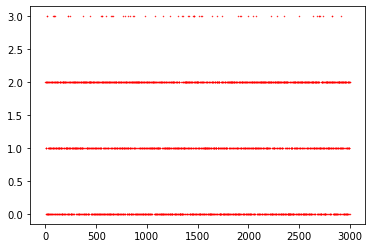

In [29]:
plt.scatter(range(y_train.shape[0]),y_train, s=0.2, c='r')
plt.show()

In [59]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=2000, input_shape=(pca_train.shape[1],  ), activation='relu'))
model.add(keras.layers.Dense(units=2000, activation='relu'))
model.add(keras.layers.Dense(units=4, activation='softmax'))

model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
# epochs：表示一共训练的周期， batch_size：把多少层组合成一个训练单元，多线程加速
history = model.fit(pca_train, y_train, epochs=10, batch_size=32)
model.summary()

Train on 3000 samples
Epoch 1/10
3000/3000 [==============================] - ETA: 16s - loss: 1.4120 - accuracy: 0.093 - ETA: 12s - loss: 1.7247 - accuracy: 0.171 - ETA: 10s - loss: 1.5458 - accuracy: 0.312 - ETA: 10s - loss: 1.4827 - accuracy: 0.406 - ETA: 9s - loss: 1.3792 - accuracy: 0.468 - ETA: 9s - loss: 1.2726 - accuracy: 0.51 - ETA: 9s - loss: 1.1963 - accuracy: 0.54 - ETA: 8s - loss: 1.1261 - accuracy: 0.59 - ETA: 8s - loss: 1.0580 - accuracy: 0.61 - ETA: 8s - loss: 1.0015 - accuracy: 0.63 - ETA: 8s - loss: 0.9433 - accuracy: 0.66 - ETA: 7s - loss: 0.9045 - accuracy: 0.68 - ETA: 7s - loss: 0.8587 - accuracy: 0.69 - ETA: 7s - loss: 0.8415 - accuracy: 0.70 - ETA: 7s - loss: 0.8390 - accuracy: 0.70 - ETA: 7s - loss: 0.7945 - accuracy: 0.72 - ETA: 7s - loss: 0.7722 - accuracy: 0.73 - ETA: 7s - loss: 0.7429 - accuracy: 0.74 - ETA: 7s - loss: 0.7175 - accuracy: 0.75 - ETA: 7s - loss: 0.6920 - accuracy: 0.76 - ETA: 7s - loss: 0.6821 - accuracy: 0.77 - ETA: 6s - loss: 0.6648 - accura

3000/3000 [==============================] - ETA: 7s - loss: 9.3671e-04 - accuracy: 1.00 - ETA: 8s - loss: 6.1044e-04 - accuracy: 1.00 - ETA: 8s - loss: 5.9936e-04 - accuracy: 1.00 - ETA: 8s - loss: 4.7781e-04 - accuracy: 1.00 - ETA: 8s - loss: 4.2140e-04 - accuracy: 1.00 - ETA: 8s - loss: 3.7374e-04 - accuracy: 1.00 - ETA: 7s - loss: 3.4998e-04 - accuracy: 1.00 - ETA: 7s - loss: 3.1781e-04 - accuracy: 1.00 - ETA: 7s - loss: 3.6177e-04 - accuracy: 1.00 - ETA: 7s - loss: 3.2686e-04 - accuracy: 1.00 - ETA: 7s - loss: 3.0959e-04 - accuracy: 1.00 - ETA: 7s - loss: 3.1830e-04 - accuracy: 1.00 - ETA: 7s - loss: 3.2421e-04 - accuracy: 1.00 - ETA: 7s - loss: 3.0425e-04 - accuracy: 1.00 - ETA: 7s - loss: 2.8794e-04 - accuracy: 1.00 - ETA: 7s - loss: 3.2980e-04 - accuracy: 1.00 - ETA: 7s - loss: 4.9094e-04 - accuracy: 1.00 - ETA: 6s - loss: 5.0426e-04 - accuracy: 1.00 - ETA: 6s - loss: 4.8367e-04 - accuracy: 1.00 - ETA: 6s - loss: 4.6143e-04 - accuracy: 1.00 - ETA: 6s - loss: 0.0054 - accuracy: 

3000/3000 [==============================] - ETA: 8s - loss: 1.1020e-04 - accuracy: 1.00 - ETA: 8s - loss: 9.0369e-05 - accuracy: 1.00 - ETA: 7s - loss: 8.2653e-05 - accuracy: 1.00 - ETA: 7s - loss: 1.0078e-04 - accuracy: 1.00 - ETA: 7s - loss: 9.4762e-05 - accuracy: 1.00 - ETA: 7s - loss: 8.3859e-05 - accuracy: 1.00 - ETA: 7s - loss: 7.4542e-05 - accuracy: 1.00 - ETA: 7s - loss: 7.0006e-05 - accuracy: 1.00 - ETA: 7s - loss: 6.7733e-05 - accuracy: 1.00 - ETA: 7s - loss: 8.1391e-05 - accuracy: 1.00 - ETA: 7s - loss: 7.7644e-05 - accuracy: 1.00 - ETA: 7s - loss: 7.3222e-05 - accuracy: 1.00 - ETA: 7s - loss: 7.1270e-05 - accuracy: 1.00 - ETA: 7s - loss: 7.4262e-05 - accuracy: 1.00 - ETA: 7s - loss: 7.1723e-05 - accuracy: 1.00 - ETA: 7s - loss: 7.0856e-05 - accuracy: 1.00 - ETA: 7s - loss: 0.0050 - accuracy: 0.9982   - ETA: 7s - loss: 0.0047 - accuracy: 0.99 - ETA: 6s - loss: 0.0052 - accuracy: 0.99 - ETA: 6s - loss: 0.0049 - accuracy: 0.99 - ETA: 6s - loss: 0.0064 - accuracy: 0.99 - ETA: 

3000/3000 [==============================] - ETA: 9s - loss: 1.9787e-04 - accuracy: 1.00 - ETA: 9s - loss: 1.0701e-04 - accuracy: 1.00 - ETA: 9s - loss: 7.3800e-05 - accuracy: 1.00 - ETA: 9s - loss: 6.0410e-05 - accuracy: 1.00 - ETA: 9s - loss: 4.9834e-05 - accuracy: 1.00 - ETA: 9s - loss: 4.3501e-05 - accuracy: 1.00 - ETA: 9s - loss: 3.9584e-05 - accuracy: 1.00 - ETA: 9s - loss: 4.0778e-05 - accuracy: 1.00 - ETA: 9s - loss: 4.0275e-05 - accuracy: 1.00 - ETA: 9s - loss: 3.7961e-05 - accuracy: 1.00 - ETA: 8s - loss: 3.7190e-05 - accuracy: 1.00 - ETA: 8s - loss: 3.5018e-05 - accuracy: 1.00 - ETA: 8s - loss: 3.7407e-05 - accuracy: 1.00 - ETA: 8s - loss: 3.6394e-05 - accuracy: 1.00 - ETA: 8s - loss: 3.5639e-05 - accuracy: 1.00 - ETA: 8s - loss: 3.6538e-05 - accuracy: 1.00 - ETA: 8s - loss: 3.5709e-05 - accuracy: 1.00 - ETA: 8s - loss: 3.5115e-05 - accuracy: 1.00 - ETA: 8s - loss: 3.4211e-05 - accuracy: 1.00 - ETA: 7s - loss: 3.3654e-05 - accuracy: 1.00 - ETA: 7s - loss: 3.3330e-05 - accura

In [60]:
result = model.predict(pca_test)

In [61]:
array = np.zeros((len(result), 1))
for i in range(len(result)):
    array[i] = np.argmax(result[i])
array, array.shape

(array([[2.],
        [0.],
        [0.],
        ...,
        [2.],
        [2.],
        [1.]]), (4317, 1))

In [62]:
print(classification_report(Y2[index[3000:] ], array))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1295
         1.0       0.96      0.92      0.94      1281
         2.0       0.94      0.97      0.96      1644
         3.0       0.17      0.03      0.05        97

    accuracy                           0.94      4317
   macro avg       0.75      0.73      0.73      4317
weighted avg       0.93      0.94      0.93      4317



In [63]:
num = []
for i in range(array.shape[0]):
    if Y2[index[3000:]][i] != array[i]:
        num.append(i)
len(num)

249

In [65]:
(array.shape[0] - 347) / array.shape[0]

0.9196201065554783

In [66]:
index_error = index[np.array(num)]
index_error, index_error.shape

(array([ 958, 3067, 2767,  130, 5954, 3222, 1226, 5039, 5870, 2240, 4016,
        4825,  315, 5779, 1125, 5478, 6063, 3015, 4062, 2449, 4456, 3249,
         463, 6041, 4947, 7192, 5227, 6764, 2341, 5053, 2769, 6863, 6849,
        3885, 4619, 4373,  584,  877,  375, 3265, 4747, 1409, 4304, 1504,
        4688,  671, 5809, 2975, 1064, 6495, 5710, 4296, 2846, 3571, 2925,
        4102, 1345, 2638, 2055, 2735, 5514, 6868, 1091, 3967, 4575, 6330,
        3887, 1908, 2124, 2081, 1527, 5394, 4516,  596, 6006, 3875, 2808,
          79, 4612, 3224, 2655, 2853, 1446,  250, 3905, 1912, 3681, 5422,
        1764,  192,  801, 6028, 5203, 6687, 1150, 1062, 4534,  148, 4213,
        4795, 6127, 4867, 1671, 3611, 3614, 1974, 3286, 1706, 6714, 6175,
        7079, 2362, 1061, 3073,  570, 1902, 4725,   18, 7315, 1507, 3504,
        7034, 1223,  546, 4365, 5610, 3049,  786, 2071,  636, 6236, 2584,
        5998, 3442, 2995, 1683,  326,  973,  860, 3836, 7178, 6787,  674,
        2439, 4954,  396, 6704, 2644, 

In [82]:
train = np.vstack((pca_train, pca_data[index_error]))
labels = np.hstack((y_train, Y2[index_error]))
model.fit(train, labels, epochs=10, batch_size=32)

Train on 3249 samples
Epoch 1/10
3249/3249 [==============================] - ETA: 11s - loss: 0.0017 - accuracy: 1.000 - ETA: 10s - loss: 0.0166 - accuracy: 0.984 - ETA: 9s - loss: 0.0117 - accuracy: 0.989 - ETA: 9s - loss: 0.0323 - accuracy: 0.98 - ETA: 9s - loss: 0.0260 - accuracy: 0.98 - ETA: 9s - loss: 0.0217 - accuracy: 0.98 - ETA: 9s - loss: 0.0186 - accuracy: 0.99 - ETA: 9s - loss: 0.0164 - accuracy: 0.99 - ETA: 9s - loss: 0.0247 - accuracy: 0.98 - ETA: 9s - loss: 0.0229 - accuracy: 0.99 - ETA: 9s - loss: 0.0210 - accuracy: 0.99 - ETA: 8s - loss: 0.0192 - accuracy: 0.99 - ETA: 8s - loss: 0.0178 - accuracy: 0.99 - ETA: 8s - loss: 0.0264 - accuracy: 0.99 - ETA: 8s - loss: 0.0250 - accuracy: 0.99 - ETA: 8s - loss: 0.0234 - accuracy: 0.99 - ETA: 8s - loss: 0.0221 - accuracy: 0.99 - ETA: 8s - loss: 0.0229 - accuracy: 0.99 - ETA: 8s - loss: 0.0221 - accuracy: 0.99 - ETA: 8s - loss: 0.0233 - accuracy: 0.99 - ETA: 8s - loss: 0.0224 - accuracy: 0.99 - ETA: 8s - loss: 0.0286 - accuracy: 

3249/3249 [==============================] - ETA: 9s - loss: 0.0052 - accuracy: 1.00 - ETA: 9s - loss: 0.0145 - accuracy: 1.00 - ETA: 9s - loss: 0.0117 - accuracy: 1.00 - ETA: 9s - loss: 0.0104 - accuracy: 1.00 - ETA: 9s - loss: 0.0089 - accuracy: 1.00 - ETA: 9s - loss: 0.0081 - accuracy: 1.00 - ETA: 9s - loss: 0.0794 - accuracy: 0.99 - ETA: 9s - loss: 0.0736 - accuracy: 0.99 - ETA: 9s - loss: 0.0664 - accuracy: 0.99 - ETA: 9s - loss: 0.0855 - accuracy: 0.98 - ETA: 8s - loss: 0.0781 - accuracy: 0.98 - ETA: 8s - loss: 0.0716 - accuracy: 0.98 - ETA: 8s - loss: 0.0663 - accuracy: 0.99 - ETA: 8s - loss: 0.0627 - accuracy: 0.99 - ETA: 8s - loss: 0.0922 - accuracy: 0.98 - ETA: 8s - loss: 0.0879 - accuracy: 0.99 - ETA: 8s - loss: 0.1130 - accuracy: 0.98 - ETA: 7s - loss: 0.1360 - accuracy: 0.98 - ETA: 7s - loss: 0.1586 - accuracy: 0.98 - ETA: 7s - loss: 0.1592 - accuracy: 0.98 - ETA: 7s - loss: 0.1756 - accuracy: 0.98 - ETA: 7s - loss: 0.1681 - accuracy: 0.98 - ETA: 7s - loss: 0.1608 - accura

3249/3249 [==============================] - ETA: 9s - loss: 0.0850 - accuracy: 0.93 - ETA: 9s - loss: 0.0427 - accuracy: 0.96 - ETA: 9s - loss: 0.0289 - accuracy: 0.97 - ETA: 9s - loss: 0.0221 - accuracy: 0.98 - ETA: 9s - loss: 0.0179 - accuracy: 0.98 - ETA: 9s - loss: 0.0193 - accuracy: 0.98 - ETA: 9s - loss: 0.0197 - accuracy: 0.98 - ETA: 9s - loss: 0.0174 - accuracy: 0.98 - ETA: 9s - loss: 0.0155 - accuracy: 0.98 - ETA: 9s - loss: 0.0140 - accuracy: 0.99 - ETA: 8s - loss: 0.0313 - accuracy: 0.98 - ETA: 8s - loss: 0.0287 - accuracy: 0.98 - ETA: 8s - loss: 0.0265 - accuracy: 0.99 - ETA: 8s - loss: 0.0247 - accuracy: 0.99 - ETA: 8s - loss: 0.0230 - accuracy: 0.99 - ETA: 8s - loss: 0.0216 - accuracy: 0.99 - ETA: 8s - loss: 0.0204 - accuracy: 0.99 - ETA: 8s - loss: 0.0193 - accuracy: 0.99 - ETA: 7s - loss: 0.0184 - accuracy: 0.99 - ETA: 7s - loss: 0.0186 - accuracy: 0.99 - ETA: 7s - loss: 0.0177 - accuracy: 0.99 - ETA: 7s - loss: 0.0190 - accuracy: 0.99 - ETA: 7s - loss: 0.0182 - accura

3249/3249 [==============================] - ETA: 9s - loss: 7.0424e-04 - accuracy: 1.00 - ETA: 9s - loss: 0.0165 - accuracy: 0.9844   - ETA: 9s - loss: 0.0127 - accuracy: 0.98 - ETA: 9s - loss: 0.0095 - accuracy: 0.99 - ETA: 9s - loss: 0.0077 - accuracy: 0.99 - ETA: 9s - loss: 0.0065 - accuracy: 0.99 - ETA: 8s - loss: 0.0056 - accuracy: 0.99 - ETA: 8s - loss: 0.0049 - accuracy: 0.99 - ETA: 8s - loss: 0.0055 - accuracy: 0.99 - ETA: 8s - loss: 0.0050 - accuracy: 0.99 - ETA: 8s - loss: 0.0046 - accuracy: 0.99 - ETA: 8s - loss: 0.0061 - accuracy: 0.99 - ETA: 8s - loss: 0.0056 - accuracy: 0.99 - ETA: 8s - loss: 0.0052 - accuracy: 0.99 - ETA: 8s - loss: 0.0049 - accuracy: 0.99 - ETA: 8s - loss: 0.0046 - accuracy: 0.99 - ETA: 8s - loss: 0.0210 - accuracy: 0.99 - ETA: 7s - loss: 0.0199 - accuracy: 0.99 - ETA: 7s - loss: 0.0188 - accuracy: 0.99 - ETA: 7s - loss: 0.0179 - accuracy: 0.99 - ETA: 7s - loss: 0.0170 - accuracy: 0.99 - ETA: 7s - loss: 0.0175 - accuracy: 0.99 - ETA: 7s - loss: 0.0168 

3249/3249 [==============================] - ETA: 9s - loss: 4.6493e-05 - accuracy: 1.00 - ETA: 9s - loss: 1.8719e-04 - accuracy: 1.00 - ETA: 9s - loss: 1.5660e-04 - accuracy: 1.00 - ETA: 9s - loss: 1.1858e-04 - accuracy: 1.00 - ETA: 9s - loss: 1.2744e-04 - accuracy: 1.00 - ETA: 9s - loss: 1.3319e-04 - accuracy: 1.00 - ETA: 9s - loss: 1.2686e-04 - accuracy: 1.00 - ETA: 9s - loss: 4.2339e-04 - accuracy: 1.00 - ETA: 8s - loss: 4.4743e-04 - accuracy: 1.00 - ETA: 8s - loss: 4.0411e-04 - accuracy: 1.00 - ETA: 8s - loss: 3.7659e-04 - accuracy: 1.00 - ETA: 8s - loss: 3.5001e-04 - accuracy: 1.00 - ETA: 8s - loss: 3.6170e-04 - accuracy: 1.00 - ETA: 8s - loss: 3.5571e-04 - accuracy: 1.00 - ETA: 8s - loss: 3.3372e-04 - accuracy: 1.00 - ETA: 8s - loss: 3.2084e-04 - accuracy: 1.00 - ETA: 8s - loss: 3.0275e-04 - accuracy: 1.00 - ETA: 8s - loss: 2.8679e-04 - accuracy: 1.00 - ETA: 7s - loss: 2.8790e-04 - accuracy: 1.00 - ETA: 7s - loss: 2.7877e-04 - accuracy: 1.00 - ETA: 7s - loss: 2.7389e-04 - accura

#### keyValue = {'BenDi': 0, 'Cs137': 1, 'CsGo': 2, 'Cs': 1, 'G60': 3, 'Eu155': 4}

In [84]:
re = model.predict(pca_test)
array = np.zeros((len(re), 1))
for i in range(len(re)):
    array[i] = np.argmax(re[i])
print(classification_report(Y2[index[3000:] ], array))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1295
         1.0       0.97      0.92      0.94      1281
         2.0       0.95      0.98      0.96      1644
         3.0       0.11      0.04      0.06        97

    accuracy                           0.94      4317
   macro avg       0.74      0.73      0.73      4317
weighted avg       0.93      0.94      0.93      4317



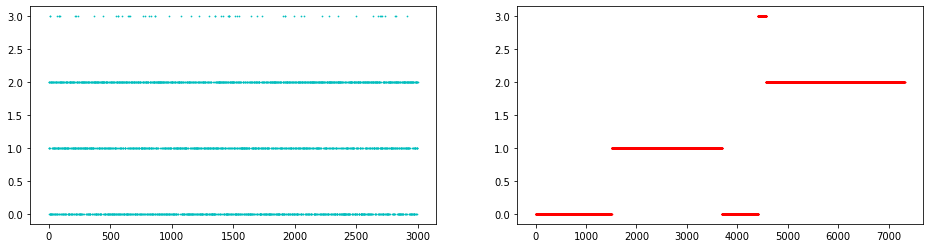

In [85]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].scatter(range(y_train.shape[0]), y_train, s=0.5, c='c')
axes[1].scatter(range(Y2.shape[0]), Y2, s=0.5, c='r')
plt.show()

In [78]:
labels = np.hstack((Y2[index[3000:] ], Y2[index_error]))
labels

array([2., 0., 0., ..., 0., 0., 0.])

In [81]:
train.shape, labels.shape

((3249, 2967), (4566,))

In [77]:
Y2[index[3000:]].shape, Y2[index_error].shape

((4317,), (249,))

In [70]:
result2 = model.predict(pca_test)
result2

array([[0.0000000e+00, 2.1901396e-09, 1.0000000e+00, 0.0000000e+00],
       [9.8356634e-01, 4.3587253e-05, 1.2046264e-15, 1.6390029e-02],
       [9.9906904e-01, 1.2938594e-06, 4.2890448e-18, 9.2971232e-04],
       ...,
       [1.6251674e-37, 3.5989748e-07, 9.9999964e-01, 0.0000000e+00],
       [0.0000000e+00, 6.3093159e-12, 1.0000000e+00, 0.0000000e+00],
       [3.4243600e-18, 3.6696509e-02, 9.6330351e-01, 1.7873663e-22]],
      dtype=float32)

In [71]:
array2 = np.zeros((len(result2), 1))
for i in range(len(result2)):
    array2[i] = np.argmax(result2[i])
array2, array2.shape

(array([[2.],
        [0.],
        [0.],
        ...,
        [2.],
        [2.],
        [2.]]), (4317, 1))

In [72]:
print(classification_report(Y2[index[3000:] ], array2))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1295
         1.0       0.97      0.80      0.88      1281
         2.0       0.87      0.98      0.92      1644
         3.0       0.16      0.07      0.10        97

    accuracy                           0.91      4317
   macro avg       0.73      0.71      0.71      4317
weighted avg       0.90      0.91      0.90      4317



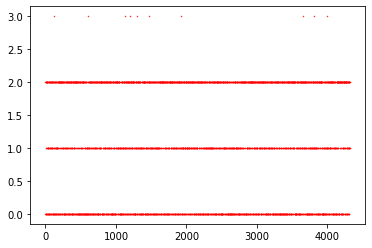

In [35]:
plt.scatter(range(array.shape[0]), array, s=0.2, c='r')
plt.show()

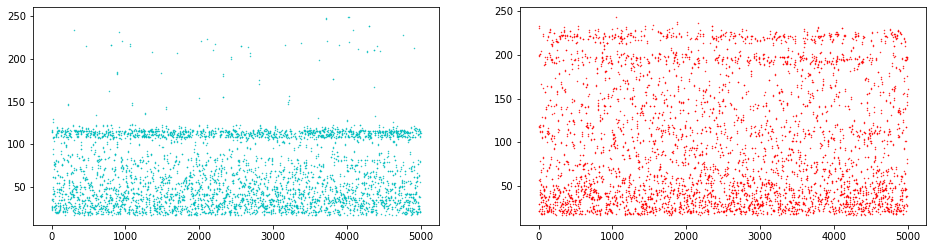

In [91]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].scatter(range(5000), X1[0, :], s=0.2, c='c')
axes[1].scatter(range(5000), X1[7300, :], s=0.2, c='r')
plt.show()

In [92]:
x_train = X1[index[: 5000]]/np.max(X1)
y_train = Y2[index[: 5000]]
x_test = X1[index[5000: ]]/np.max(X1)
y_test = Y2[index[5000: ]]

In [93]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=2000, input_shape=(x_train.shape[1],  ), activation='relu'))
model.add(keras.layers.Dense(units=2000, activation='relu'))
model.add(keras.layers.Dense(units=4, activation='softmax'))

model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
# epochs：表示一共训练的周期， batch_size：把多少层组合成一个训练单元，多线程加速
history = model.fit(x_train, y_train, epochs=10, batch_size=32)
model.summary()

Train on 5000 samples
Epoch 1/10
5000/5000 [==============================] - ETA: 38s - loss: 1.6107 - accuracy: 0.093 - ETA: 29s - loss: 5.3386 - accuracy: 0.265 - ETA: 25s - loss: 6.2454 - accuracy: 0.343 - ETA: 24s - loss: 6.8247 - accuracy: 0.375 - ETA: 23s - loss: 7.5753 - accuracy: 0.368 - ETA: 22s - loss: 8.1596 - accuracy: 0.359 - ETA: 21s - loss: 8.7209 - accuracy: 0.343 - ETA: 21s - loss: 8.5122 - accuracy: 0.371 - ETA: 21s - loss: 8.7977 - accuracy: 0.364 - ETA: 20s - loss: 9.0260 - accuracy: 0.359 - ETA: 20s - loss: 9.2586 - accuracy: 0.352 - ETA: 19s - loss: 9.1587 - accuracy: 0.364 - ETA: 19s - loss: 9.5390 - accuracy: 0.346 - ETA: 19s - loss: 9.5772 - accuracy: 0.348 - ETA: 19s - loss: 9.7447 - accuracy: 0.341 - ETA: 19s - loss: 9.8912 - accuracy: 0.335 - ETA: 18s - loss: 9.9315 - accuracy: 0.336 - ETA: 18s - loss: 10.0234 - accuracy: 0.33 - ETA: 18s - loss: 10.0525 - accuracy: 0.33 - ETA: 18s - loss: 9.9529 - accuracy: 0.3422 - ETA: 18s - loss: 10.0066 - accuracy: 0.34

5000/5000 [==============================] - ETA: 20s - loss: 12.0886 - accuracy: 0.25 - ETA: 19s - loss: 11.3330 - accuracy: 0.29 - ETA: 20s - loss: 10.5775 - accuracy: 0.34 - ETA: 20s - loss: 10.9553 - accuracy: 0.32 - ETA: 19s - loss: 10.7790 - accuracy: 0.33 - ETA: 19s - loss: 10.5775 - accuracy: 0.34 - ETA: 19s - loss: 10.4336 - accuracy: 0.35 - ETA: 19s - loss: 10.3257 - accuracy: 0.35 - ETA: 19s - loss: 10.1298 - accuracy: 0.37 - ETA: 19s - loss: 9.9731 - accuracy: 0.3812 - ETA: 18s - loss: 10.0280 - accuracy: 0.37 - ETA: 18s - loss: 9.9899 - accuracy: 0.3802 - ETA: 18s - loss: 9.9188 - accuracy: 0.384 - ETA: 18s - loss: 9.8939 - accuracy: 0.386 - ETA: 18s - loss: 9.9395 - accuracy: 0.383 - ETA: 18s - loss: 10.0738 - accuracy: 0.37 - ETA: 18s - loss: 10.1627 - accuracy: 0.36 - ETA: 18s - loss: 10.1857 - accuracy: 0.36 - ETA: 17s - loss: 10.1268 - accuracy: 0.37 - ETA: 17s - loss: 10.0990 - accuracy: 0.37 - ETA: 17s - loss: 10.0019 - accuracy: 0.37 - ETA: 17s - loss: 10.0509 - ac

5000/5000 [==============================] - ETA: 17s - loss: 11.0812 - accuracy: 0.31 - ETA: 17s - loss: 10.5775 - accuracy: 0.34 - ETA: 17s - loss: 10.0738 - accuracy: 0.37 - ETA: 17s - loss: 10.0738 - accuracy: 0.37 - ETA: 17s - loss: 10.2753 - accuracy: 0.36 - ETA: 17s - loss: 10.4936 - accuracy: 0.34 - ETA: 17s - loss: 10.2897 - accuracy: 0.36 - ETA: 17s - loss: 10.3886 - accuracy: 0.35 - ETA: 17s - loss: 10.1298 - accuracy: 0.37 - ETA: 17s - loss: 10.0738 - accuracy: 0.37 - ETA: 17s - loss: 9.9364 - accuracy: 0.3835 - ETA: 17s - loss: 9.9479 - accuracy: 0.382 - ETA: 17s - loss: 9.9188 - accuracy: 0.384 - ETA: 17s - loss: 9.8220 - accuracy: 0.390 - ETA: 17s - loss: 9.7716 - accuracy: 0.393 - ETA: 17s - loss: 9.8849 - accuracy: 0.386 - ETA: 17s - loss: 9.8368 - accuracy: 0.389 - ETA: 17s - loss: 9.8499 - accuracy: 0.388 - ETA: 17s - loss: 9.7822 - accuracy: 0.393 - ETA: 16s - loss: 9.6709 - accuracy: 0.400 - ETA: 16s - loss: 9.5221 - accuracy: 0.409 - ETA: 16s - loss: 9.5930 - accu

5000/5000 [==============================] - ETA: 18s - loss: 12.5923 - accuracy: 0.21 - ETA: 18s - loss: 10.5775 - accuracy: 0.34 - ETA: 19s - loss: 11.9207 - accuracy: 0.26 - ETA: 18s - loss: 11.3330 - accuracy: 0.29 - ETA: 19s - loss: 10.8797 - accuracy: 0.32 - ETA: 18s - loss: 10.7454 - accuracy: 0.33 - ETA: 18s - loss: 10.7934 - accuracy: 0.33 - ETA: 18s - loss: 10.7034 - accuracy: 0.33 - ETA: 18s - loss: 10.5215 - accuracy: 0.34 - ETA: 18s - loss: 10.3257 - accuracy: 0.35 - ETA: 18s - loss: 10.0280 - accuracy: 0.37 - ETA: 18s - loss: 9.7380 - accuracy: 0.3958 - ETA: 18s - loss: 9.6476 - accuracy: 0.401 - ETA: 17s - loss: 9.7860 - accuracy: 0.392 - ETA: 17s - loss: 9.8723 - accuracy: 0.387 - ETA: 17s - loss: 9.9164 - accuracy: 0.384 - ETA: 17s - loss: 9.9553 - accuracy: 0.382 - ETA: 17s - loss: 9.9339 - accuracy: 0.383 - ETA: 17s - loss: 9.9678 - accuracy: 0.381 - ETA: 17s - loss: 9.9227 - accuracy: 0.384 - ETA: 17s - loss: 9.9059 - accuracy: 0.385 - ETA: 16s - loss: 9.9364 - accu

5000/5000 [==============================] - ETA: 17s - loss: 11.0812 - accuracy: 0.31 - ETA: 18s - loss: 9.8220 - accuracy: 0.3906 - ETA: 18s - loss: 10.0738 - accuracy: 0.37 - ETA: 18s - loss: 10.0738 - accuracy: 0.37 - ETA: 18s - loss: 9.7716 - accuracy: 0.3938 - ETA: 18s - loss: 9.9059 - accuracy: 0.385 - ETA: 18s - loss: 10.0019 - accuracy: 0.37 - ETA: 17s - loss: 9.7590 - accuracy: 0.3945 - ETA: 17s - loss: 9.5701 - accuracy: 0.406 - ETA: 17s - loss: 9.4190 - accuracy: 0.415 - ETA: 17s - loss: 9.5243 - accuracy: 0.409 - ETA: 17s - loss: 9.5281 - accuracy: 0.408 - ETA: 17s - loss: 9.7638 - accuracy: 0.394 - ETA: 17s - loss: 9.7500 - accuracy: 0.395 - ETA: 17s - loss: 9.8388 - accuracy: 0.389 - ETA: 17s - loss: 9.8220 - accuracy: 0.390 - ETA: 17s - loss: 9.8664 - accuracy: 0.387 - ETA: 16s - loss: 9.9339 - accuracy: 0.383 - ETA: 16s - loss: 10.0208 - accuracy: 0.37 - ETA: 16s - loss: 10.0234 - accuracy: 0.37 - ETA: 16s - loss: 10.0498 - accuracy: 0.37 - ETA: 16s - loss: 10.1196 - a

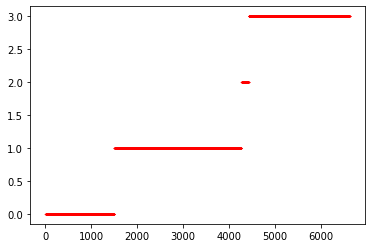

In [13]:
plt.scatter(range(6633), label.T, s=0.2, c='r')
plt.show()

### 1 获取训练数据与测试数据

In [14]:
a1 = np.random.randint(10, 6633, 1000)
dataSet_test = df.values[a1, 3: 5003]
y_label = df.values[a1, 5003]

dataSet_test.shape, dataSet_test, y_label

((1000, 5000), array([[193., 193., 219., ..., 109.,  41.,  42.],
        [ 65.,  44.,  44., ...,  37.,  44.,  45.],
        [184., 184.,  21., ..., 145., 144., 115.],
        ...,
        [115.,  20.,  18., ...,  30.,  31.,  34.],
        [ 91.,  92., 168., ...,  44.,  45.,  39.],
        [ 20.,  20., 137., ...,  66., 118., 118.]]), array([1., 3., 3., 1., 1., 3., 0., 3., 1., 1., 0., 0., 3., 0., 1., 0., 0.,
        3., 0., 1., 2., 1., 1., 1., 1., 3., 1., 1., 1., 3., 0., 0., 3., 1.,
        0., 0., 0., 3., 3., 0., 3., 1., 1., 1., 3., 1., 0., 1., 1., 3., 1.,
        1., 0., 0., 1., 0., 1., 1., 1., 3., 3., 1., 3., 0., 0., 0., 3., 3.,
        3., 0., 2., 3., 1., 0., 3., 3., 3., 3., 0., 1., 3., 0., 1., 3., 1.,
        1., 3., 3., 3., 2., 0., 3., 0., 1., 1., 3., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 0., 1., 0., 3., 1., 3., 3., 3., 3., 1., 1., 1., 1., 1.,
        3., 1., 0., 3., 1., 3., 1., 3., 1., 0., 1., 0., 1., 1., 1., 3., 2.,
        0., 1., 1., 0., 3., 1., 1., 3., 3., 0., 1., 1., 0.

In [16]:
a2 = np.random.randint(0, 6633, 5000)
dataSet_train = df.values[a2, 3: 5003]
dataSet_label = df.values[a2, 5003]
dataSet_train, dataSet_label

(array([[ 66.,  66., 221., ...,  30.,  31.,  30.],
        [222.,  78.,  76., ..., 193., 194.,  28.],
        [112.,  20.,  22., ...,  43., 109., 109.],
        ...,
        [151., 154., 125., ...,  92.,  94.,  16.],
        [215., 212., 112., ...,  20., 230., 230.],
        [ 42.,  38.,  21., ...,  30.,  30., 115.]]),
 array([3., 3., 3., ..., 3., 3., 3.]))

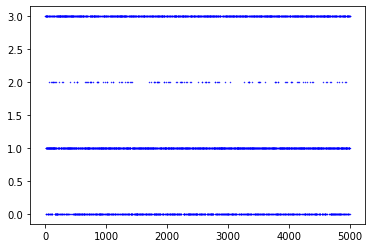

In [17]:
plt.scatter(range(5000), dataSet_label, s=0.2, c='b')
plt.show()

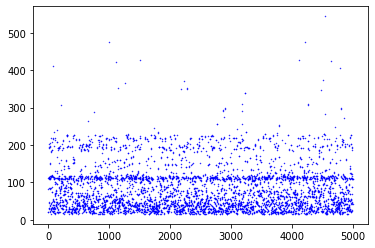

In [18]:
plt.scatter(range(5000), dataSet_train[2, :], s=0.2, c='b')
plt.show()

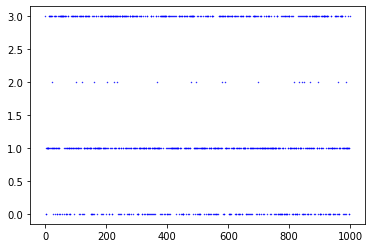

In [37]:
plt.scatter(range(1000), y_label, s=0.2, c='b')
plt.show()

In [19]:
x_train = dataSet_train/dataSet.max()
y_test = dataSet_test/dataSet.max()

y_label, x_train.shape, y_test

(array([1., 3., 3., 1., 1., 3., 0., 3., 1., 1., 0., 0., 3., 0., 1., 0., 0.,
        3., 0., 1., 2., 1., 1., 1., 1., 3., 1., 1., 1., 3., 0., 0., 3., 1.,
        0., 0., 0., 3., 3., 0., 3., 1., 1., 1., 3., 1., 0., 1., 1., 3., 1.,
        1., 0., 0., 1., 0., 1., 1., 1., 3., 3., 1., 3., 0., 0., 0., 3., 3.,
        3., 0., 2., 3., 1., 0., 3., 3., 3., 3., 0., 1., 3., 0., 1., 3., 1.,
        1., 3., 3., 3., 2., 0., 3., 0., 1., 1., 3., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 0., 1., 0., 3., 1., 3., 3., 3., 3., 1., 1., 1., 1., 1.,
        3., 1., 0., 3., 1., 3., 1., 3., 1., 0., 1., 0., 1., 1., 1., 3., 2.,
        0., 1., 1., 0., 3., 1., 1., 3., 3., 0., 1., 1., 0., 3., 1., 2., 1.,
        1., 3., 3., 1., 3., 3., 0., 3., 3., 3., 1., 0., 3., 1., 0., 0., 0.,
        3., 1., 0., 3., 0., 3., 1., 1., 0., 0., 0., 3., 1., 3., 0., 0., 0.,
        1., 0., 1., 1., 3., 3., 0., 3., 3., 1., 0., 1., 3., 1., 1., 2., 3.,
        3., 3., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
        3., 

In [20]:
def data_pca(x_train, x_test, COMPONENT_NUM):
    start = time.time()
    print("====>>===>>===>> PCA ")
    pca = PCA(n_components=COMPONENT_NUM, copy=True, whiten=False)  # 创建一个 PCA 对象
    pca.fit(x_train)    # 构建 PCA 模型
    pcaXTrain = pca.transform(x_train)
    pcaXTest = pca.transform(x_test)
    print('pca time is %0.3fs' % (time.time() - start))
    return pcaXTrain, pcaXTest

In [21]:
start = time.time()
pca_train, pca_test = data_pca(x_train, y_test, 0.95)
end = time.time()
print('time = %0.3fs' % (end - start))
pca_train.shape, pca_test.shape

====>>===>>===>> PCA 
pca time is 77.500s
time = 77.516s


((5000, 2102), (1000, 2102))

In [24]:
pca_train.shape[1]

2102

In [27]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=2000, input_shape=(pca_train.shape[1],  ), activation='relu'))
model.add(keras.layers.Dense(units=2000, activation='relu'))
model.add(keras.layers.Dense(units=4, activation='softmax'))

model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
# epochs：表示一共训练的周期， batch_size：把多少层组合成一个训练单元，多线程加速
history = model.fit(pca_train, dataSet_label, epochs=10, batch_size=32)
model.summary()

W1017 22:06:59.755769  5732 deprecation.py:323] From e:\anaconda\envs\deeplearning\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 14s 3ms/sample - loss: 0.2459 - accuracy: 0.9258s - loss: 0.272 - ETA: 0s - loss: 0.2485 - ac
Epoch 2/10
5000/5000 [==============================] - 13s 3ms/sample - loss: 0.0204 - accuracy: 0.9942
Epoch 3/10
5000/5000 [==============================] - 12s 2ms/sample - loss: 0.0046 - accuracy: 0.9994
Epoch 4/10
5000/5000 [==============================] - 12s 2ms/sample - loss: 1.6586e-04 - accuracy: 1.0000
Epoch 5/10
5000/5000 [==============================] - 12s 2ms/sample - loss: 8.2146e-05 - accuracy: 1.0000
Epoch 6/10
5000/5000 [==============================] - 13s 3ms/sample - loss: 5.8465e-05 - accuracy: 1.0000
Epoch 7/10
5000/5000 [==============================] - 12s 2ms/sample - loss: 4.4495e-05 - accuracy: 1.0000
Epoch 8/10
5000/5000 [==============================] - 12s 2ms/sample - loss: 3.5345e-05 - accuracy: 1.0000
Epoch 9/10
5000/5000 [==============================] - 12s 2ms/sample - 

In [28]:
history.history

{'loss': [0.24587583314478398,
  0.020367497971281408,
  0.004645177263906225,
  0.00016585938297212125,
  8.214561610657256e-05,
  5.846545862150379e-05,
  4.449473142449278e-05,
  3.5344753158278764e-05,
  2.871123315417208e-05,
  2.3691421962575985e-05],
 'accuracy': [0.9258, 0.9942, 0.9994, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

In [29]:
loss = history.history['loss']
accuracy = history.history['accuracy']

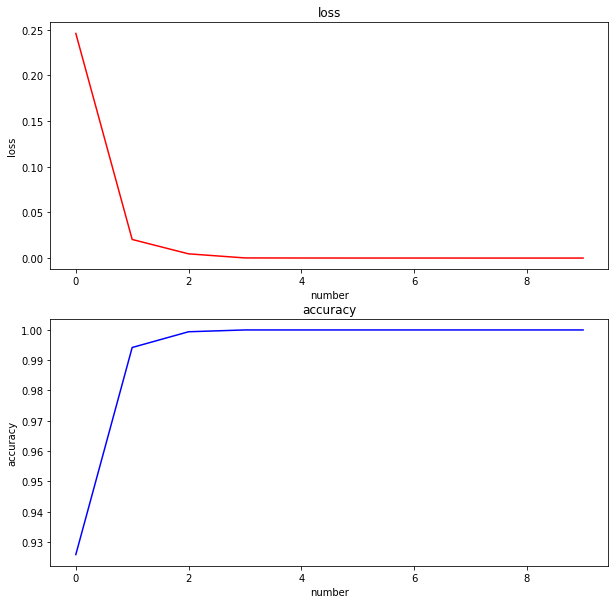

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].plot(loss, c='r')
axes[0].set_title('loss')
axes[0].set_ylabel('loss')
axes[0].set_xlabel('number')

axes[1].plot(accuracy, c='b')
axes[1].set_title('accuracy')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('number')
plt.show()

In [32]:
result = model.predict(pca_test)
result

array([[1.37725003e-27, 9.99999881e-01, 1.18649779e-21, 9.75863017e-08],
       [6.49576905e-05, 4.94165470e-05, 4.83632612e-04, 9.99402046e-01],
       [1.27144624e-04, 2.36585056e-05, 1.32355641e-03, 9.98525679e-01],
       ...,
       [9.95153546e-01, 1.54981910e-16, 4.78666835e-03, 5.98365223e-05],
       [7.89664259e-28, 9.99999881e-01, 1.52668137e-21, 1.18284788e-07],
       [1.07567456e-23, 9.99995947e-01, 5.96233957e-19, 4.03731519e-06]],
      dtype=float32)

In [33]:
array = np.zeros((len(result), 1))
for i in range(len(result)):
    array[i] = np.argmax(result[i])
array

array([[1.],
       [3.],
       [3.],
       [1.],
       [1.],
       [3.],
       [0.],
       [3.],
       [1.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [3.],
       [1.],
       [1.],
       [1.],
       [3.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [3.],
       [0.],
       [3.],
       [1.],
       [1.],
       [1.],
       [3.],
       [1.],
       [0.],
       [1.],
       [1.],
       [3.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [3.],
       [3.],
       [1.],
       [3.],
       [0.],
       [0.],
       [0.],
       [3.],
       [3.],
       [3.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [3.],
       [3.],
       [3.],

In [42]:
num0 = 0
error_array = []
for i in range(1000):
    if array[i, 0] == y_label[i]:
        num0 += 1
    else:
        print(y_label[i], ' and ', array[i, 0], end='\t')
        error_array.append(i)
print()
print('accuracy  = %0.3f%%' % (num0/1000 * 100))
num0, error_array

3.0  and  1.0	2.0  and  0.0	2.0  and  0.0	2.0  and  0.0	2.0  and  0.0	2.0  and  0.0	3.0  and  1.0	2.0  and  0.0	3.0  and  1.0	1.0  and  3.0	2.0  and  0.0	3.0  and  1.0	3.0  and  1.0	
accuracy  = 98.700%


(987, [37, 70, 151, 325, 418, 445, 500, 588, 627, 637, 690, 752, 754])

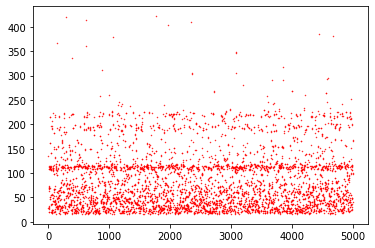

In [54]:
plt.scatter(range(5000), dataSet_test[error_array[0]], s=0.2, c='r')
plt.show()  

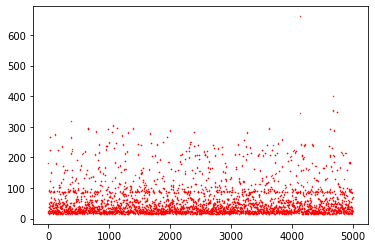

In [55]:
plt.scatter(range(5000), dataSet_test[error_array[1]], s=0.2, c='r')
plt.show()  

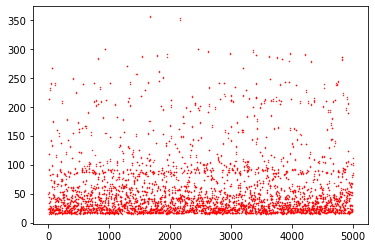

In [56]:
plt.scatter(range(5000), dataSet_test[error_array[2]], s=0.2, c='r')
plt.show()  

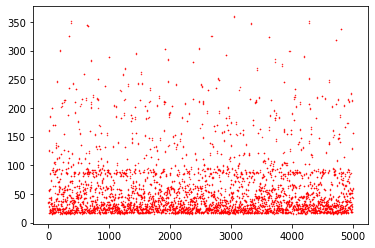

In [57]:
plt.scatter(range(5000), dataSet_test[error_array[3]], s=0.2, c='r')
plt.show()  

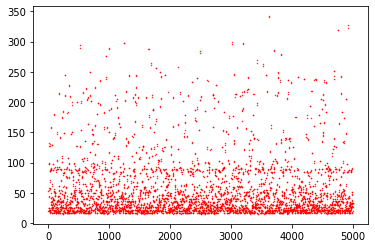

In [59]:
plt.scatter(range(5000), dataSet_test[error_array[4]], s=0.2, c='r')
plt.show()  

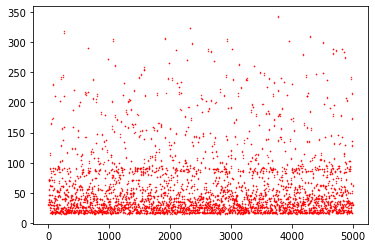

In [61]:
plt.scatter(range(5000), dataSet_test[error_array[5]], s=0.2, c='r')
plt.show()  

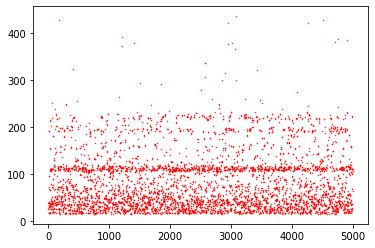

In [62]:
plt.scatter(range(5000), dataSet_test[error_array[6]], s=0.2, c='r')
plt.show()  

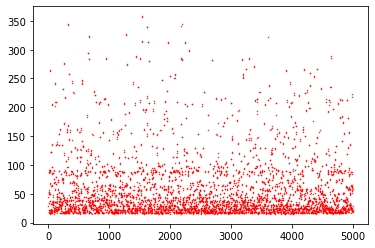

In [63]:
plt.scatter(range(5000), dataSet_test[error_array[7]], s=0.2, c='r')
plt.show()  

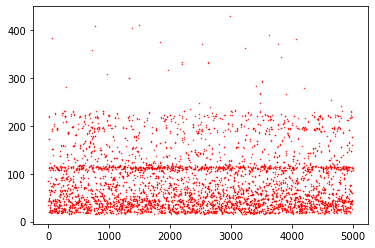

In [64]:
plt.scatter(range(5000), dataSet_test[error_array[8]], s=0.2, c='r')
plt.show()  

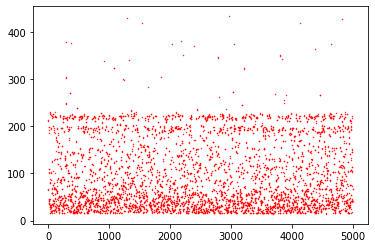

In [65]:
plt.scatter(range(5000), dataSet_test[error_array[9]], s=0.2, c='r')
plt.show()  

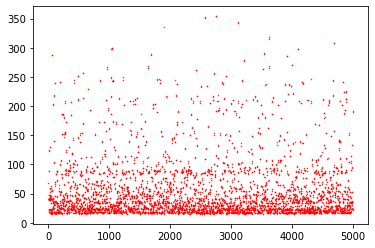

In [66]:
plt.scatter(range(5000), dataSet_test[error_array[10]], s=0.2, c='r')
plt.show()  

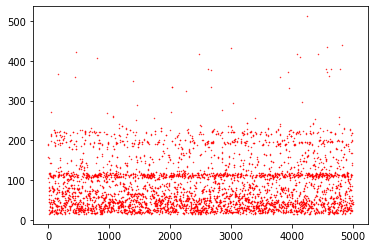

In [68]:
plt.scatter(range(5000), dataSet_test[error_array[11]], s=0.2, c='r')
plt.show()  

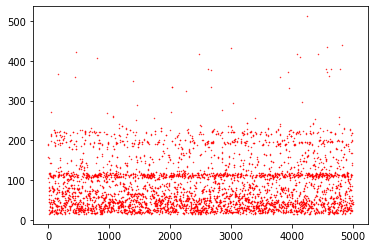

In [69]:
plt.scatter(range(5000), dataSet_test[error_array[11]], s=0.2, c='r')
plt.show()  

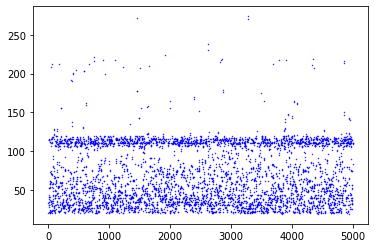

In [70]:
plt.scatter(range(5000), dataSet[1], s=0.2, c='b')
plt.show()  

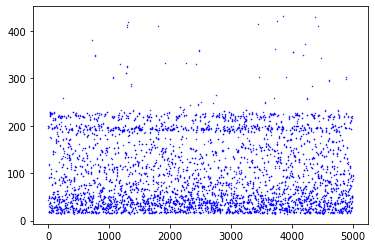

In [71]:
plt.scatter(range(5000), dataSet[2000], s=0.2, c='b')
plt.show()  

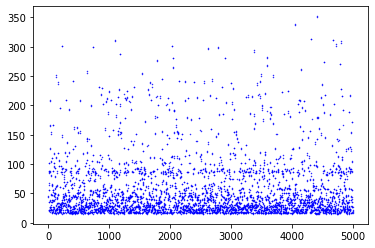

In [78]:
plt.scatter(range(5000), dataSet[4290], s=0.2, c='b')
plt.show()  

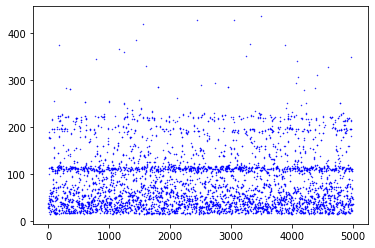

In [80]:
plt.scatter(range(5000), dataSet[5100], s=0.2, c='b')
plt.show()  

### 3 进一步处理数据

In [81]:
x_label.shape

(6633,)

In [85]:

num_0 = 0
num_1 = 0
num_2 = 0
num_3 = 0
for i in range(x_label.shape[0]):
    if x_label[i]==0:
        num_0 += 1
    elif x_label[i]==1:
        num_1 += 1
    elif x_label[i]==2:
        num_2 += 1
    else:
        num_3 += 1
num_0, num_1, num_2, num_3

(1501, 2770, 160, 2202)

In [88]:
result[error_array]
df2 = pd.DataFrame(result[error_array])
df2

,0,1,2,3
0,1.113306e-10,9.902866e-01,1.457979e-08,9.713336e-03
1,8.010105e-01,1.355214e-23,1.989280e-01,6.149642e-05
2,1.000000e+00,2.362897e-33,8.794079e-10,3.949953e-10
3,9.999709e-01,6.764655e-28,2.901510e-05,8.953226e-08
4,1.000000e+00,2.598307e-31,1.139633e-08,4.335133e-09
5,9.999993e-01,5.950355e-29,6.632980e-07,6.969823e-09
6,8.697177e-10,9.809142e-01,1.480335e-07,1.908565e-02
7,9.999932e-01,8.402678e-26,6.498902e-06,1.973143e-07
8,2.337938e-09,8.830324e-01,1.000340e-07,1.169674e-01
9,1.329471e-13,1.548283e-03,1.957966e-12,9.984517e-01


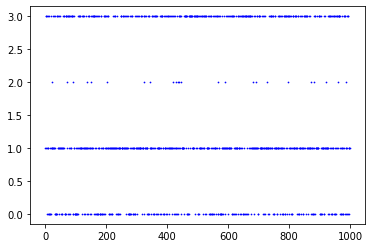

In [45]:
plt.scatter(range(1000), y_label, s=0.5, c='b')
plt.show()

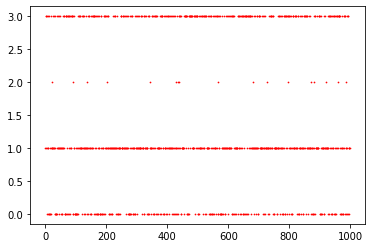

In [36]:
plt.scatter(range(1000), array, s=0.5, c='r')
plt.show()

In [3]:
df.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '4991', '4992', '4993', '4994', '4995', '4996', '4997', '4998', '4999',
       '5000'],
      dtype='object', length=5002)

In [24]:
a1 = df.values
a1

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 8.200e+01, 3.200e+01,
        0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 1.090e+02, 8.400e+01,
        0.000e+00],
       [2.000e+00, 2.000e+00, 2.000e+00, ..., 4.800e+01, 5.100e+01,
        0.000e+00],
       ...,
       [6.630e+03, 6.630e+03, 6.630e+03, ..., 4.500e+01, 1.090e+02,
        3.000e+00],
       [6.631e+03, 6.631e+03, 6.631e+03, ..., 2.800e+01, 3.000e+01,
        3.000e+00],
       [6.632e+03, 6.632e+03, 6.632e+03, ..., 1.140e+02, 1.540e+02,
        3.000e+00]])

In [28]:
# dataSet = np.delete(dataSet,range(dataSet3.shape[0]+dataSet4.shape[0]+dataSet5.shape[0], dataSet.shape[0]), axis=0)
a1 = np.delete(a1, range(3), axis=1)

In [29]:
a1.shape

(6633, 5001)

In [36]:
df = pd.DataFrame(a1)
df

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,39.0,41.0,36.0,39.0,83.0,50.0,26.0,47.0,45.0,76.0,...,40.0,39.0,49.0,48.0,73.0,74.0,81.0,82.0,32.0,0.0
1,33.0,20.0,28.0,31.0,41.0,43.0,52.0,53.0,31.0,22.0,...,51.0,52.0,37.0,36.0,111.0,111.0,111.0,109.0,84.0,0.0
2,83.0,41.0,38.0,87.0,31.0,20.0,26.0,70.0,69.0,23.0,...,112.0,111.0,81.0,28.0,32.0,39.0,37.0,48.0,51.0,0.0
3,111.0,114.0,112.0,42.0,39.0,36.0,38.0,40.0,25.0,24.0,...,112.0,113.0,51.0,49.0,59.0,58.0,41.0,42.0,110.0,0.0
4,112.0,67.0,67.0,80.0,78.0,37.0,39.0,48.0,49.0,86.0,...,118.0,116.0,110.0,105.0,89.0,27.0,107.0,106.0,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6628,20.0,21.0,118.0,116.0,112.0,29.0,110.0,113.0,89.0,90.0,...,49.0,42.0,39.0,67.0,118.0,116.0,52.0,51.0,46.0,3.0
6629,47.0,17.0,20.0,67.0,67.0,20.0,19.0,95.0,94.0,27.0,...,249.0,249.0,51.0,50.0,36.0,36.0,24.0,23.0,109.0,3.0
6630,20.0,20.0,111.0,112.0,101.0,95.0,53.0,55.0,79.0,82.0,...,102.0,36.0,35.0,208.0,207.0,220.0,46.0,45.0,109.0,3.0
6631,112.0,17.0,142.0,91.0,82.0,82.0,31.0,32.0,26.0,26.0,...,68.0,21.0,39.0,39.0,182.0,54.0,54.0,28.0,30.0,3.0


In [37]:
df.rename(columns={5000: 'label'})

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,label
0,39.0,41.0,36.0,39.0,83.0,50.0,26.0,47.0,45.0,76.0,...,40.0,39.0,49.0,48.0,73.0,74.0,81.0,82.0,32.0,0.0
1,33.0,20.0,28.0,31.0,41.0,43.0,52.0,53.0,31.0,22.0,...,51.0,52.0,37.0,36.0,111.0,111.0,111.0,109.0,84.0,0.0
2,83.0,41.0,38.0,87.0,31.0,20.0,26.0,70.0,69.0,23.0,...,112.0,111.0,81.0,28.0,32.0,39.0,37.0,48.0,51.0,0.0
3,111.0,114.0,112.0,42.0,39.0,36.0,38.0,40.0,25.0,24.0,...,112.0,113.0,51.0,49.0,59.0,58.0,41.0,42.0,110.0,0.0
4,112.0,67.0,67.0,80.0,78.0,37.0,39.0,48.0,49.0,86.0,...,118.0,116.0,110.0,105.0,89.0,27.0,107.0,106.0,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6628,20.0,21.0,118.0,116.0,112.0,29.0,110.0,113.0,89.0,90.0,...,49.0,42.0,39.0,67.0,118.0,116.0,52.0,51.0,46.0,3.0
6629,47.0,17.0,20.0,67.0,67.0,20.0,19.0,95.0,94.0,27.0,...,249.0,249.0,51.0,50.0,36.0,36.0,24.0,23.0,109.0,3.0
6630,20.0,20.0,111.0,112.0,101.0,95.0,53.0,55.0,79.0,82.0,...,102.0,36.0,35.0,208.0,207.0,220.0,46.0,45.0,109.0,3.0
6631,112.0,17.0,142.0,91.0,82.0,82.0,31.0,32.0,26.0,26.0,...,68.0,21.0,39.0,39.0,182.0,54.0,54.0,28.0,30.0,3.0


In [38]:
df.to_csv('../Cs137data/dataSet_no_Bendi3.csv')

In [35]:
df1 = pd.read_csv('../Cs137data/dataSet_no_Bendi3.csv')
df1

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,0,39.0,41.0,36.0,39.0,83.0,50.0,26.0,47.0,45.0,...,40.0,39.0,49.0,48.0,73.0,74.0,81.0,82.0,32.0,0.0
1,1,33.0,20.0,28.0,31.0,41.0,43.0,52.0,53.0,31.0,...,51.0,52.0,37.0,36.0,111.0,111.0,111.0,109.0,84.0,0.0
2,2,83.0,41.0,38.0,87.0,31.0,20.0,26.0,70.0,69.0,...,112.0,111.0,81.0,28.0,32.0,39.0,37.0,48.0,51.0,0.0
3,3,111.0,114.0,112.0,42.0,39.0,36.0,38.0,40.0,25.0,...,112.0,113.0,51.0,49.0,59.0,58.0,41.0,42.0,110.0,0.0
4,4,112.0,67.0,67.0,80.0,78.0,37.0,39.0,48.0,49.0,...,118.0,116.0,110.0,105.0,89.0,27.0,107.0,106.0,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6628,6628,20.0,21.0,118.0,116.0,112.0,29.0,110.0,113.0,89.0,...,49.0,42.0,39.0,67.0,118.0,116.0,52.0,51.0,46.0,3.0
6629,6629,47.0,17.0,20.0,67.0,67.0,20.0,19.0,95.0,94.0,...,249.0,249.0,51.0,50.0,36.0,36.0,24.0,23.0,109.0,3.0
6630,6630,20.0,20.0,111.0,112.0,101.0,95.0,53.0,55.0,79.0,...,102.0,36.0,35.0,208.0,207.0,220.0,46.0,45.0,109.0,3.0
6631,6631,112.0,17.0,142.0,91.0,82.0,82.0,31.0,32.0,26.0,...,68.0,21.0,39.0,39.0,182.0,54.0,54.0,28.0,30.0,3.0


(1000, 1)

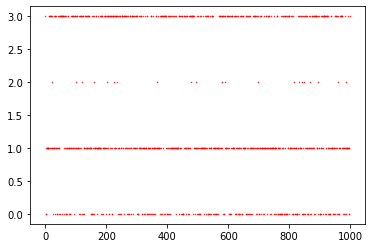

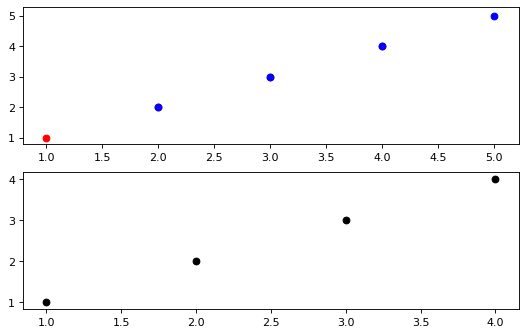

In [49]:
import matplotlib.pyplot as plt
import numpy as np
a = np.array([1,2,3,4])
b = np.array([1,2,3,4])
c = np.array([2,3,4,5])
d = np.array([2,3,4,5])
'''
figure的作用新建绘画窗口,独立显示绘画的图片
figsize 表示新建绘画窗口的大小
dpi是分辨率
'''
plt.figure(figsize = (8,5),dpi = 80)
'''
这个比较重要,需要重点掌握,参数有r,c,n三个参数
使用这个函数的重点是将多个图像画在同一个绘画窗口.
r   表示行数
c   表示列行
n   表示第几个
'''
plt.subplot(2,1,1)#表示一个绘画窗口下建立两个子图，选择第一个作为绘画图
plt.scatter(a,b,c = 'r')
plt.scatter(c,d,c = 'b')
#将会在第一个图中画出两种颜色不一样的点
plt.subplot(2,1,2)
plt.scatter(a,b,c = 'black')
plt.show()

### 本底数据

In [2]:
file_name = '../Cs137data/lis/BenDi_10min_01.Lis'
ground_pulse = nucleus.get_pulse_data(file_name)

N/A% (0 of 78073) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (19 of 78073) |                     | Elapsed Time: 0:00:00 ETA:   0:06:57
  0% (41 of 78073) |                     | Elapsed Time: 0:00:00 ETA:   0:06:27
  0% (63 of 78073) |                     | Elapsed Time: 0:00:00 ETA:   0:06:21
  0% (85 of 78073) |                     | Elapsed Time: 0:00:00 ETA:   0:06:16
  0% (106 of 78073) |                    | Elapsed Time: 0:00:00 ETA:   0:06:16
  0% (128 of 78073) |                    | Elapsed Time: 0:00:00 ETA:   0:06:13
  0% (149 of 78073) |                    | Elapsed Time: 0:00:00 ETA:   0:06:15
  0% (169 of 78073) |                    | Elapsed Time: 0:00:00 ETA:   0:06:17
  0% (191 of 78073) |                    | Elapsed Time: 0:00:00 ETA:   0:06:16
  0% (212 of 78073) |                    | Elapsed Time: 0:00:01 ETA:   0:06:16
  0% (234 of 78073) |                    | Elapsed Time: 0:00:01 ETA:   0:06:15
  0% (255 of 78073) |                   

  2% (2190 of 78073) |                   | Elapsed Time: 0:00:10 ETA:   0:06:03
  2% (2213 of 78073) |                   | Elapsed Time: 0:00:10 ETA:   0:06:01
  2% (2234 of 78073) |                   | Elapsed Time: 0:00:10 ETA:   0:06:02
  2% (2256 of 78073) |                   | Elapsed Time: 0:00:10 ETA:   0:06:00
  2% (2277 of 78073) |                   | Elapsed Time: 0:00:10 ETA:   0:06:00
  2% (2299 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:05:59
  2% (2322 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:05:58
  3% (2344 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:05:56
  3% (2366 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:05:54
  3% (2387 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:05:54
  3% (2408 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:05:56
  3% (2430 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:05:55
  3% (2453 of 78073) |                  

  5% (4406 of 78073) |#                  | Elapsed Time: 0:00:21 ETA:   0:06:02
  5% (4427 of 78073) |#                  | Elapsed Time: 0:00:21 ETA:   0:05:59
  5% (4448 of 78073) |#                  | Elapsed Time: 0:00:21 ETA:   0:05:57
  5% (4471 of 78073) |#                  | Elapsed Time: 0:00:21 ETA:   0:05:53
  5% (4493 of 78073) |#                  | Elapsed Time: 0:00:21 ETA:   0:05:50
  5% (4516 of 78073) |#                  | Elapsed Time: 0:00:21 ETA:   0:05:49
  5% (4537 of 78073) |#                  | Elapsed Time: 0:00:21 ETA:   0:05:49
  5% (4559 of 78073) |#                  | Elapsed Time: 0:00:21 ETA:   0:05:49
  5% (4582 of 78073) |#                  | Elapsed Time: 0:00:21 ETA:   0:05:48
  5% (4604 of 78073) |#                  | Elapsed Time: 0:00:22 ETA:   0:05:48
  5% (4625 of 78073) |#                  | Elapsed Time: 0:00:22 ETA:   0:05:48
  5% (4647 of 78073) |#                  | Elapsed Time: 0:00:22 ETA:   0:05:46
  5% (4668 of 78073) |#                 

  8% (6601 of 78073) |#                  | Elapsed Time: 0:00:31 ETA:   0:05:45
  8% (6613 of 78073) |#                  | Elapsed Time: 0:00:31 ETA:   0:05:53
  8% (6634 of 78073) |#                  | Elapsed Time: 0:00:31 ETA:   0:05:48
  8% (6656 of 78073) |#                  | Elapsed Time: 0:00:31 ETA:   0:05:48
  8% (6678 of 78073) |#                  | Elapsed Time: 0:00:31 ETA:   0:05:49
  8% (6688 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:05:59
  8% (6710 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:05:58
  8% (6732 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:05:58
  8% (6753 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:05:58
  8% (6774 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:06:01
  8% (6795 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:06:00
  8% (6817 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:06:00
  8% (6838 of 78073) |#                 

 11% (8817 of 78073) |##                 | Elapsed Time: 0:00:42 ETA:   0:05:22
 11% (8838 of 78073) |##                 | Elapsed Time: 0:00:42 ETA:   0:05:23
 11% (8859 of 78073) |##                 | Elapsed Time: 0:00:42 ETA:   0:05:24
 11% (8881 of 78073) |##                 | Elapsed Time: 0:00:42 ETA:   0:05:23
 11% (8895 of 78073) |##                 | Elapsed Time: 0:00:42 ETA:   0:05:23
 11% (8916 of 78073) |##                 | Elapsed Time: 0:00:42 ETA:   0:05:23
 11% (8937 of 78073) |##                 | Elapsed Time: 0:00:42 ETA:   0:05:24
 11% (8959 of 78073) |##                 | Elapsed Time: 0:00:42 ETA:   0:05:24
 11% (8981 of 78073) |##                 | Elapsed Time: 0:00:42 ETA:   0:05:24
 11% (9002 of 78073) |##                 | Elapsed Time: 0:00:42 ETA:   0:05:24
 11% (9024 of 78073) |##                 | Elapsed Time: 0:00:43 ETA:   0:05:23
 11% (9046 of 78073) |##                 | Elapsed Time: 0:00:43 ETA:   0:05:23
 11% (9067 of 78073) |##                

 14% (11047 of 78073) |##                | Elapsed Time: 0:00:52 ETA:   0:05:13
 14% (11069 of 78073) |##                | Elapsed Time: 0:00:52 ETA:   0:05:13
 14% (11090 of 78073) |##                | Elapsed Time: 0:00:52 ETA:   0:05:14
 14% (11112 of 78073) |##                | Elapsed Time: 0:00:52 ETA:   0:05:15
 14% (11132 of 78073) |##                | Elapsed Time: 0:00:53 ETA:   0:05:17
 14% (11154 of 78073) |##                | Elapsed Time: 0:00:53 ETA:   0:05:16
 14% (11178 of 78073) |##                | Elapsed Time: 0:00:53 ETA:   0:05:13
 14% (11200 of 78073) |##                | Elapsed Time: 0:00:53 ETA:   0:05:13
 14% (11221 of 78073) |##                | Elapsed Time: 0:00:53 ETA:   0:05:12
 14% (11243 of 78073) |##                | Elapsed Time: 0:00:53 ETA:   0:05:12
 14% (11266 of 78073) |##                | Elapsed Time: 0:00:53 ETA:   0:05:11
 14% (11289 of 78073) |##                | Elapsed Time: 0:00:53 ETA:   0:05:10
 14% (11313 of 78073) |##               

 17% (13319 of 78073) |###               | Elapsed Time: 0:01:03 ETA:   0:05:06
 17% (13341 of 78073) |###               | Elapsed Time: 0:01:03 ETA:   0:05:05
 17% (13364 of 78073) |###               | Elapsed Time: 0:01:03 ETA:   0:05:03
 17% (13386 of 78073) |###               | Elapsed Time: 0:01:03 ETA:   0:05:03
 17% (13408 of 78073) |###               | Elapsed Time: 0:01:03 ETA:   0:05:03
 17% (13429 of 78073) |###               | Elapsed Time: 0:01:03 ETA:   0:05:02
 17% (13452 of 78073) |###               | Elapsed Time: 0:01:03 ETA:   0:05:01
 17% (13474 of 78073) |###               | Elapsed Time: 0:01:03 ETA:   0:05:01
 17% (13497 of 78073) |###               | Elapsed Time: 0:01:03 ETA:   0:05:01
 17% (13520 of 78073) |###               | Elapsed Time: 0:01:04 ETA:   0:05:01
 17% (13543 of 78073) |###               | Elapsed Time: 0:01:04 ETA:   0:05:00
 17% (13563 of 78073) |###               | Elapsed Time: 0:01:04 ETA:   0:05:01
 17% (13583 of 78073) |###              

 19% (15584 of 78073) |###               | Elapsed Time: 0:01:13 ETA:   0:04:55
 19% (15607 of 78073) |###               | Elapsed Time: 0:01:13 ETA:   0:04:55
 20% (15630 of 78073) |###               | Elapsed Time: 0:01:13 ETA:   0:04:54
 20% (15652 of 78073) |###               | Elapsed Time: 0:01:13 ETA:   0:04:54
 20% (15672 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:04:55
 20% (15694 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:04:55
 20% (15716 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:04:53
 20% (15738 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:04:52
 20% (15761 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:04:51
 20% (15782 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:04:52
 20% (15804 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:04:51
 20% (15825 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:04:51
 20% (15845 of 78073) |###              

 22% (17808 of 78073) |####              | Elapsed Time: 0:01:24 ETA:   0:04:45
 22% (17829 of 78073) |####              | Elapsed Time: 0:01:24 ETA:   0:04:45
 22% (17850 of 78073) |####              | Elapsed Time: 0:01:24 ETA:   0:04:46
 22% (17872 of 78073) |####              | Elapsed Time: 0:01:24 ETA:   0:04:47
 22% (17893 of 78073) |####              | Elapsed Time: 0:01:24 ETA:   0:04:47
 22% (17914 of 78073) |####              | Elapsed Time: 0:01:24 ETA:   0:04:47
 22% (17937 of 78073) |####              | Elapsed Time: 0:01:24 ETA:   0:04:46
 23% (17958 of 78073) |####              | Elapsed Time: 0:01:24 ETA:   0:04:46
 23% (17979 of 78073) |####              | Elapsed Time: 0:01:24 ETA:   0:04:46
 23% (18000 of 78073) |####              | Elapsed Time: 0:01:25 ETA:   0:04:47
 23% (18020 of 78073) |####              | Elapsed Time: 0:01:25 ETA:   0:04:46
 23% (18042 of 78073) |####              | Elapsed Time: 0:01:25 ETA:   0:04:46
 23% (18064 of 78073) |####             

 25% (20025 of 78073) |####              | Elapsed Time: 0:01:34 ETA:   0:04:35
 25% (20048 of 78073) |####              | Elapsed Time: 0:01:34 ETA:   0:04:34
 25% (20069 of 78073) |####              | Elapsed Time: 0:01:34 ETA:   0:04:33
 25% (20091 of 78073) |####              | Elapsed Time: 0:01:34 ETA:   0:04:33
 25% (20112 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:04:32
 25% (20133 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:04:32
 25% (20156 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:04:31
 25% (20177 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:04:31
 25% (20197 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:04:32
 25% (20220 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:04:32
 25% (20240 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:04:33
 25% (20262 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:04:33
 25% (20284 of 78073) |####             

 28% (22293 of 78073) |#####             | Elapsed Time: 0:01:45 ETA:   0:04:19
 28% (22314 of 78073) |#####             | Elapsed Time: 0:01:45 ETA:   0:04:19
 28% (22335 of 78073) |#####             | Elapsed Time: 0:01:45 ETA:   0:04:19
 28% (22358 of 78073) |#####             | Elapsed Time: 0:01:45 ETA:   0:04:19
 28% (22380 of 78073) |#####             | Elapsed Time: 0:01:45 ETA:   0:04:19
 28% (22403 of 78073) |#####             | Elapsed Time: 0:01:45 ETA:   0:04:19
 28% (22427 of 78073) |#####             | Elapsed Time: 0:01:45 ETA:   0:04:18
 28% (22452 of 78073) |#####             | Elapsed Time: 0:01:45 ETA:   0:04:17
 28% (22475 of 78073) |#####             | Elapsed Time: 0:01:45 ETA:   0:04:16
 28% (22498 of 78073) |#####             | Elapsed Time: 0:01:46 ETA:   0:04:15
 28% (22521 of 78073) |#####             | Elapsed Time: 0:01:46 ETA:   0:04:13
 28% (22543 of 78073) |#####             | Elapsed Time: 0:01:46 ETA:   0:04:13
 28% (22566 of 78073) |#####            

 31% (24570 of 78073) |#####             | Elapsed Time: 0:01:55 ETA:   0:04:08
 31% (24593 of 78073) |#####             | Elapsed Time: 0:01:55 ETA:   0:04:08
 31% (24615 of 78073) |#####             | Elapsed Time: 0:01:55 ETA:   0:04:08
 31% (24637 of 78073) |#####             | Elapsed Time: 0:01:55 ETA:   0:04:09
 31% (24659 of 78073) |#####             | Elapsed Time: 0:01:56 ETA:   0:04:08
 31% (24682 of 78073) |#####             | Elapsed Time: 0:01:56 ETA:   0:04:07
 31% (24704 of 78073) |#####             | Elapsed Time: 0:01:56 ETA:   0:04:07
 31% (24726 of 78073) |#####             | Elapsed Time: 0:01:56 ETA:   0:04:08
 31% (24749 of 78073) |#####             | Elapsed Time: 0:01:56 ETA:   0:04:07
 31% (24771 of 78073) |#####             | Elapsed Time: 0:01:56 ETA:   0:04:06
 31% (24793 of 78073) |#####             | Elapsed Time: 0:01:56 ETA:   0:04:05
 31% (24815 of 78073) |#####             | Elapsed Time: 0:01:56 ETA:   0:04:05
 31% (24836 of 78073) |#####            

 34% (26829 of 78073) |######            | Elapsed Time: 0:02:06 ETA:   0:03:55
 34% (26851 of 78073) |######            | Elapsed Time: 0:02:06 ETA:   0:03:55
 34% (26874 of 78073) |######            | Elapsed Time: 0:02:06 ETA:   0:03:56
 34% (26897 of 78073) |######            | Elapsed Time: 0:02:06 ETA:   0:03:55
 34% (26919 of 78073) |######            | Elapsed Time: 0:02:06 ETA:   0:03:54
 34% (26941 of 78073) |######            | Elapsed Time: 0:02:06 ETA:   0:03:55
 34% (26962 of 78073) |######            | Elapsed Time: 0:02:06 ETA:   0:03:56
 34% (26983 of 78073) |######            | Elapsed Time: 0:02:06 ETA:   0:03:56
 34% (27002 of 78073) |######            | Elapsed Time: 0:02:07 ETA:   0:03:59
 34% (27024 of 78073) |######            | Elapsed Time: 0:02:07 ETA:   0:03:58
 34% (27045 of 78073) |######            | Elapsed Time: 0:02:07 ETA:   0:04:00
 34% (27065 of 78073) |######            | Elapsed Time: 0:02:07 ETA:   0:04:02
 34% (27088 of 78073) |######           

 37% (29075 of 78073) |######            | Elapsed Time: 0:02:16 ETA:   0:03:48
 37% (29096 of 78073) |######            | Elapsed Time: 0:02:16 ETA:   0:03:48
 37% (29118 of 78073) |######            | Elapsed Time: 0:02:16 ETA:   0:03:49
 37% (29141 of 78073) |######            | Elapsed Time: 0:02:17 ETA:   0:03:49
 37% (29162 of 78073) |######            | Elapsed Time: 0:02:17 ETA:   0:03:49
 37% (29186 of 78073) |######            | Elapsed Time: 0:02:17 ETA:   0:03:48
 37% (29208 of 78073) |######            | Elapsed Time: 0:02:17 ETA:   0:03:47
 37% (29229 of 78073) |######            | Elapsed Time: 0:02:17 ETA:   0:03:47
 37% (29249 of 78073) |######            | Elapsed Time: 0:02:17 ETA:   0:03:48
 37% (29271 of 78073) |######            | Elapsed Time: 0:02:17 ETA:   0:03:48
 37% (29295 of 78073) |######            | Elapsed Time: 0:02:17 ETA:   0:03:47
 37% (29316 of 78073) |######            | Elapsed Time: 0:02:17 ETA:   0:03:47
 37% (29338 of 78073) |######           

 40% (31366 of 78073) |#######           | Elapsed Time: 0:02:27 ETA:   0:03:35
 40% (31389 of 78073) |#######           | Elapsed Time: 0:02:27 ETA:   0:03:35
 40% (31412 of 78073) |#######           | Elapsed Time: 0:02:27 ETA:   0:03:34
 40% (31434 of 78073) |#######           | Elapsed Time: 0:02:27 ETA:   0:03:34
 40% (31457 of 78073) |#######           | Elapsed Time: 0:02:27 ETA:   0:03:34
 40% (31479 of 78073) |#######           | Elapsed Time: 0:02:27 ETA:   0:03:34
 40% (31502 of 78073) |#######           | Elapsed Time: 0:02:27 ETA:   0:03:34
 40% (31525 of 78073) |#######           | Elapsed Time: 0:02:27 ETA:   0:03:34
 40% (31547 of 78073) |#######           | Elapsed Time: 0:02:28 ETA:   0:03:34
 40% (31570 of 78073) |#######           | Elapsed Time: 0:02:28 ETA:   0:03:34
 40% (31592 of 78073) |#######           | Elapsed Time: 0:02:28 ETA:   0:03:34
 40% (31614 of 78073) |#######           | Elapsed Time: 0:02:28 ETA:   0:03:35
 40% (31625 of 78073) |#######          

 43% (33643 of 78073) |#######           | Elapsed Time: 0:02:37 ETA:   0:03:28
 43% (33666 of 78073) |#######           | Elapsed Time: 0:02:37 ETA:   0:03:27
 43% (33689 of 78073) |#######           | Elapsed Time: 0:02:37 ETA:   0:03:26
 43% (33711 of 78073) |#######           | Elapsed Time: 0:02:37 ETA:   0:03:26
 43% (33733 of 78073) |#######           | Elapsed Time: 0:02:38 ETA:   0:03:26
 43% (33754 of 78073) |#######           | Elapsed Time: 0:02:38 ETA:   0:03:26
 43% (33779 of 78073) |#######           | Elapsed Time: 0:02:38 ETA:   0:03:25
 43% (33801 of 78073) |#######           | Elapsed Time: 0:02:38 ETA:   0:03:25
 43% (33822 of 78073) |#######           | Elapsed Time: 0:02:38 ETA:   0:03:25
 43% (33844 of 78073) |#######           | Elapsed Time: 0:02:38 ETA:   0:03:25
 43% (33865 of 78073) |#######           | Elapsed Time: 0:02:38 ETA:   0:03:25
 43% (33887 of 78073) |#######           | Elapsed Time: 0:02:38 ETA:   0:03:24
 43% (33910 of 78073) |#######          

 45% (35889 of 78073) |########          | Elapsed Time: 0:02:48 ETA:   0:03:23
 45% (35910 of 78073) |########          | Elapsed Time: 0:02:48 ETA:   0:03:23
 46% (35932 of 78073) |########          | Elapsed Time: 0:02:48 ETA:   0:03:23
 46% (35955 of 78073) |########          | Elapsed Time: 0:02:48 ETA:   0:03:23
 46% (35977 of 78073) |########          | Elapsed Time: 0:02:48 ETA:   0:03:22
 46% (35997 of 78073) |########          | Elapsed Time: 0:02:48 ETA:   0:03:22
 46% (36020 of 78073) |########          | Elapsed Time: 0:02:48 ETA:   0:03:22
 46% (36041 of 78073) |########          | Elapsed Time: 0:02:48 ETA:   0:03:22
 46% (36064 of 78073) |########          | Elapsed Time: 0:02:49 ETA:   0:03:21
 46% (36086 of 78073) |########          | Elapsed Time: 0:02:49 ETA:   0:03:20
 46% (36108 of 78073) |########          | Elapsed Time: 0:02:49 ETA:   0:03:19
 46% (36130 of 78073) |########          | Elapsed Time: 0:02:49 ETA:   0:03:18
 46% (36152 of 78073) |########         

 48% (38135 of 78073) |########          | Elapsed Time: 0:02:58 ETA:   0:03:09
 48% (38152 of 78073) |########          | Elapsed Time: 0:02:58 ETA:   0:03:11
 48% (38172 of 78073) |########          | Elapsed Time: 0:02:58 ETA:   0:03:11
 48% (38194 of 78073) |########          | Elapsed Time: 0:02:59 ETA:   0:03:11
 48% (38216 of 78073) |########          | Elapsed Time: 0:02:59 ETA:   0:03:11
 48% (38238 of 78073) |########          | Elapsed Time: 0:02:59 ETA:   0:03:11
 49% (38259 of 78073) |########          | Elapsed Time: 0:02:59 ETA:   0:03:11
 49% (38280 of 78073) |########          | Elapsed Time: 0:02:59 ETA:   0:03:11
 49% (38303 of 78073) |########          | Elapsed Time: 0:02:59 ETA:   0:03:09
 49% (38327 of 78073) |########          | Elapsed Time: 0:02:59 ETA:   0:03:08
 49% (38350 of 78073) |########          | Elapsed Time: 0:02:59 ETA:   0:03:07
 49% (38371 of 78073) |########          | Elapsed Time: 0:02:59 ETA:   0:03:07
 49% (38393 of 78073) |########         

 51% (40374 of 78073) |#########         | Elapsed Time: 0:03:09 ETA:   0:02:57
 51% (40395 of 78073) |#########         | Elapsed Time: 0:03:09 ETA:   0:02:56
 51% (40415 of 78073) |#########         | Elapsed Time: 0:03:09 ETA:   0:02:56
 51% (40436 of 78073) |#########         | Elapsed Time: 0:03:09 ETA:   0:02:58
 51% (40456 of 78073) |#########         | Elapsed Time: 0:03:09 ETA:   0:02:58
 51% (40477 of 78073) |#########         | Elapsed Time: 0:03:09 ETA:   0:02:59
 51% (40500 of 78073) |#########         | Elapsed Time: 0:03:09 ETA:   0:02:59
 51% (40519 of 78073) |#########         | Elapsed Time: 0:03:09 ETA:   0:02:59
 51% (40542 of 78073) |#########         | Elapsed Time: 0:03:10 ETA:   0:02:59
 51% (40565 of 78073) |#########         | Elapsed Time: 0:03:10 ETA:   0:02:59
 51% (40587 of 78073) |#########         | Elapsed Time: 0:03:10 ETA:   0:02:59
 52% (40609 of 78073) |#########         | Elapsed Time: 0:03:10 ETA:   0:02:58
 52% (40631 of 78073) |#########        

 54% (42626 of 78073) |#########         | Elapsed Time: 0:03:19 ETA:   0:02:46
 54% (42649 of 78073) |#########         | Elapsed Time: 0:03:19 ETA:   0:02:46
 54% (42672 of 78073) |#########         | Elapsed Time: 0:03:19 ETA:   0:02:46
 54% (42694 of 78073) |#########         | Elapsed Time: 0:03:20 ETA:   0:02:46
 54% (42716 of 78073) |#########         | Elapsed Time: 0:03:20 ETA:   0:02:46
 54% (42738 of 78073) |#########         | Elapsed Time: 0:03:20 ETA:   0:02:46
 54% (42760 of 78073) |#########         | Elapsed Time: 0:03:20 ETA:   0:02:45
 54% (42784 of 78073) |#########         | Elapsed Time: 0:03:20 ETA:   0:02:44
 54% (42806 of 78073) |#########         | Elapsed Time: 0:03:20 ETA:   0:02:44
 54% (42827 of 78073) |#########         | Elapsed Time: 0:03:20 ETA:   0:02:43
 54% (42849 of 78073) |#########         | Elapsed Time: 0:03:20 ETA:   0:02:43
 54% (42871 of 78073) |#########         | Elapsed Time: 0:03:20 ETA:   0:02:42
 54% (42893 of 78073) |#########        

 57% (44859 of 78073) |##########        | Elapsed Time: 0:03:30 ETA:   0:02:38
 57% (44880 of 78073) |##########        | Elapsed Time: 0:03:30 ETA:   0:02:38
 57% (44902 of 78073) |##########        | Elapsed Time: 0:03:30 ETA:   0:02:38
 57% (44923 of 78073) |##########        | Elapsed Time: 0:03:30 ETA:   0:02:37
 57% (44944 of 78073) |##########        | Elapsed Time: 0:03:30 ETA:   0:02:37
 57% (44968 of 78073) |##########        | Elapsed Time: 0:03:30 ETA:   0:02:36
 57% (44989 of 78073) |##########        | Elapsed Time: 0:03:30 ETA:   0:02:37
 57% (45010 of 78073) |##########        | Elapsed Time: 0:03:30 ETA:   0:02:37
 57% (45031 of 78073) |##########        | Elapsed Time: 0:03:31 ETA:   0:02:37
 57% (45053 of 78073) |##########        | Elapsed Time: 0:03:31 ETA:   0:02:37
 57% (45075 of 78073) |##########        | Elapsed Time: 0:03:31 ETA:   0:02:37
 57% (45095 of 78073) |##########        | Elapsed Time: 0:03:31 ETA:   0:02:38
 57% (45117 of 78073) |##########       

 60% (47083 of 78073) |##########        | Elapsed Time: 0:03:40 ETA:   0:02:24
 60% (47105 of 78073) |##########        | Elapsed Time: 0:03:40 ETA:   0:02:24
 60% (47126 of 78073) |##########        | Elapsed Time: 0:03:40 ETA:   0:02:25
 60% (47146 of 78073) |##########        | Elapsed Time: 0:03:41 ETA:   0:02:25
 60% (47168 of 78073) |##########        | Elapsed Time: 0:03:41 ETA:   0:02:25
 60% (47189 of 78073) |##########        | Elapsed Time: 0:03:41 ETA:   0:02:25
 60% (47210 of 78073) |##########        | Elapsed Time: 0:03:41 ETA:   0:02:25
 60% (47231 of 78073) |##########        | Elapsed Time: 0:03:41 ETA:   0:02:26
 60% (47251 of 78073) |##########        | Elapsed Time: 0:03:41 ETA:   0:02:25
 60% (47271 of 78073) |##########        | Elapsed Time: 0:03:41 ETA:   0:02:26
 60% (47293 of 78073) |##########        | Elapsed Time: 0:03:41 ETA:   0:02:26
 60% (47315 of 78073) |##########        | Elapsed Time: 0:03:41 ETA:   0:02:25
 60% (47335 of 78073) |##########       

 63% (49307 of 78073) |###########       | Elapsed Time: 0:03:51 ETA:   0:02:12
 63% (49328 of 78073) |###########       | Elapsed Time: 0:03:51 ETA:   0:02:12
 63% (49351 of 78073) |###########       | Elapsed Time: 0:03:51 ETA:   0:02:12
 63% (49373 of 78073) |###########       | Elapsed Time: 0:03:51 ETA:   0:02:13
 63% (49396 of 78073) |###########       | Elapsed Time: 0:03:51 ETA:   0:02:13
 63% (49414 of 78073) |###########       | Elapsed Time: 0:03:51 ETA:   0:02:13
 63% (49437 of 78073) |###########       | Elapsed Time: 0:03:51 ETA:   0:02:13
 63% (49459 of 78073) |###########       | Elapsed Time: 0:03:51 ETA:   0:02:13
 63% (49482 of 78073) |###########       | Elapsed Time: 0:03:52 ETA:   0:02:12
 63% (49503 of 78073) |###########       | Elapsed Time: 0:03:52 ETA:   0:02:12
 63% (49525 of 78073) |###########       | Elapsed Time: 0:03:52 ETA:   0:02:12
 63% (49545 of 78073) |###########       | Elapsed Time: 0:03:52 ETA:   0:02:12
 63% (49567 of 78073) |###########      

 66% (51594 of 78073) |###########       | Elapsed Time: 0:04:01 ETA:   0:02:00
 66% (51618 of 78073) |###########       | Elapsed Time: 0:04:01 ETA:   0:02:00
 66% (51640 of 78073) |###########       | Elapsed Time: 0:04:01 ETA:   0:02:00
 66% (51662 of 78073) |###########       | Elapsed Time: 0:04:02 ETA:   0:02:00
 66% (51685 of 78073) |###########       | Elapsed Time: 0:04:02 ETA:   0:02:00
 66% (51706 of 78073) |###########       | Elapsed Time: 0:04:02 ETA:   0:02:00
 66% (51728 of 78073) |###########       | Elapsed Time: 0:04:02 ETA:   0:02:00
 66% (51753 of 78073) |###########       | Elapsed Time: 0:04:02 ETA:   0:01:59
 66% (51774 of 78073) |###########       | Elapsed Time: 0:04:02 ETA:   0:01:59
 66% (51797 of 78073) |###########       | Elapsed Time: 0:04:02 ETA:   0:01:59
 66% (51819 of 78073) |###########       | Elapsed Time: 0:04:02 ETA:   0:01:59
 66% (51842 of 78073) |###########       | Elapsed Time: 0:04:02 ETA:   0:01:58
 66% (51865 of 78073) |###########      

 69% (53898 of 78073) |############      | Elapsed Time: 0:04:12 ETA:   0:01:52
 69% (53920 of 78073) |############      | Elapsed Time: 0:04:12 ETA:   0:01:51
 69% (53943 of 78073) |############      | Elapsed Time: 0:04:12 ETA:   0:01:51
 69% (53966 of 78073) |############      | Elapsed Time: 0:04:12 ETA:   0:01:50
 69% (53988 of 78073) |############      | Elapsed Time: 0:04:12 ETA:   0:01:50
 69% (54009 of 78073) |############      | Elapsed Time: 0:04:12 ETA:   0:01:50
 69% (54030 of 78073) |############      | Elapsed Time: 0:04:12 ETA:   0:01:50
 69% (54051 of 78073) |############      | Elapsed Time: 0:04:13 ETA:   0:01:50
 69% (54073 of 78073) |############      | Elapsed Time: 0:04:13 ETA:   0:01:50
 69% (54096 of 78073) |############      | Elapsed Time: 0:04:13 ETA:   0:01:50
 69% (54119 of 78073) |############      | Elapsed Time: 0:04:13 ETA:   0:01:50
 69% (54142 of 78073) |############      | Elapsed Time: 0:04:13 ETA:   0:01:49
 69% (54164 of 78073) |############     

 71% (56188 of 78073) |############      | Elapsed Time: 0:04:22 ETA:   0:01:39
 71% (56209 of 78073) |############      | Elapsed Time: 0:04:22 ETA:   0:01:39
 72% (56232 of 78073) |############      | Elapsed Time: 0:04:23 ETA:   0:01:39
 72% (56254 of 78073) |############      | Elapsed Time: 0:04:23 ETA:   0:01:39
 72% (56277 of 78073) |############      | Elapsed Time: 0:04:23 ETA:   0:01:39
 72% (56301 of 78073) |############      | Elapsed Time: 0:04:23 ETA:   0:01:39
 72% (56322 of 78073) |############      | Elapsed Time: 0:04:23 ETA:   0:01:39
 72% (56344 of 78073) |############      | Elapsed Time: 0:04:23 ETA:   0:01:39
 72% (56366 of 78073) |############      | Elapsed Time: 0:04:23 ETA:   0:01:39
 72% (56389 of 78073) |#############     | Elapsed Time: 0:04:23 ETA:   0:01:38
 72% (56412 of 78073) |#############     | Elapsed Time: 0:04:23 ETA:   0:01:38
 72% (56435 of 78073) |#############     | Elapsed Time: 0:04:23 ETA:   0:01:38
 72% (56457 of 78073) |#############    

 74% (58487 of 78073) |#############     | Elapsed Time: 0:04:33 ETA:   0:01:29
 74% (58508 of 78073) |#############     | Elapsed Time: 0:04:33 ETA:   0:01:29
 74% (58530 of 78073) |#############     | Elapsed Time: 0:04:33 ETA:   0:01:29
 74% (58551 of 78073) |#############     | Elapsed Time: 0:04:33 ETA:   0:01:29
 75% (58572 of 78073) |#############     | Elapsed Time: 0:04:33 ETA:   0:01:30
 75% (58597 of 78073) |#############     | Elapsed Time: 0:04:33 ETA:   0:01:29
 75% (58619 of 78073) |#############     | Elapsed Time: 0:04:33 ETA:   0:01:29
 75% (58641 of 78073) |#############     | Elapsed Time: 0:04:34 ETA:   0:01:29
 75% (58664 of 78073) |#############     | Elapsed Time: 0:04:34 ETA:   0:01:29
 75% (58686 of 78073) |#############     | Elapsed Time: 0:04:34 ETA:   0:01:29
 75% (58708 of 78073) |#############     | Elapsed Time: 0:04:34 ETA:   0:01:29
 75% (58730 of 78073) |#############     | Elapsed Time: 0:04:34 ETA:   0:01:29
 75% (58751 of 78073) |#############    

 77% (60784 of 78073) |##############    | Elapsed Time: 0:04:43 ETA:   0:01:20
 77% (60806 of 78073) |##############    | Elapsed Time: 0:04:43 ETA:   0:01:20
 77% (60829 of 78073) |##############    | Elapsed Time: 0:04:44 ETA:   0:01:20
 77% (60851 of 78073) |##############    | Elapsed Time: 0:04:44 ETA:   0:01:20
 77% (60873 of 78073) |##############    | Elapsed Time: 0:04:44 ETA:   0:01:20
 77% (60896 of 78073) |##############    | Elapsed Time: 0:04:44 ETA:   0:01:19
 78% (60920 of 78073) |##############    | Elapsed Time: 0:04:44 ETA:   0:01:19
 78% (60944 of 78073) |##############    | Elapsed Time: 0:04:44 ETA:   0:01:19
 78% (60965 of 78073) |##############    | Elapsed Time: 0:04:44 ETA:   0:01:19
 78% (60988 of 78073) |##############    | Elapsed Time: 0:04:44 ETA:   0:01:18
 78% (61009 of 78073) |##############    | Elapsed Time: 0:04:44 ETA:   0:01:19
 78% (61030 of 78073) |##############    | Elapsed Time: 0:04:44 ETA:   0:01:18
 78% (61051 of 78073) |##############   

 80% (63013 of 78073) |##############    | Elapsed Time: 0:04:54 ETA:   0:01:12
 80% (63035 of 78073) |##############    | Elapsed Time: 0:04:54 ETA:   0:01:12
 80% (63056 of 78073) |##############    | Elapsed Time: 0:04:54 ETA:   0:01:11
 80% (63077 of 78073) |##############    | Elapsed Time: 0:04:54 ETA:   0:01:11
 80% (63100 of 78073) |##############    | Elapsed Time: 0:04:54 ETA:   0:01:10
 80% (63120 of 78073) |##############    | Elapsed Time: 0:04:54 ETA:   0:01:10
 80% (63141 of 78073) |##############    | Elapsed Time: 0:04:55 ETA:   0:01:10
 80% (63161 of 78073) |##############    | Elapsed Time: 0:04:55 ETA:   0:01:10
 80% (63183 of 78073) |##############    | Elapsed Time: 0:04:55 ETA:   0:01:10
 80% (63205 of 78073) |##############    | Elapsed Time: 0:04:55 ETA:   0:01:09
 80% (63228 of 78073) |##############    | Elapsed Time: 0:04:55 ETA:   0:01:09
 81% (63250 of 78073) |##############    | Elapsed Time: 0:04:55 ETA:   0:01:09
 81% (63271 of 78073) |##############   

 83% (65247 of 78073) |###############   | Elapsed Time: 0:05:04 ETA:   0:00:59
 83% (65269 of 78073) |###############   | Elapsed Time: 0:05:05 ETA:   0:00:59
 83% (65291 of 78073) |###############   | Elapsed Time: 0:05:05 ETA:   0:00:59
 83% (65315 of 78073) |###############   | Elapsed Time: 0:05:05 ETA:   0:00:58
 83% (65335 of 78073) |###############   | Elapsed Time: 0:05:05 ETA:   0:00:58
 83% (65359 of 78073) |###############   | Elapsed Time: 0:05:05 ETA:   0:00:58
 83% (65382 of 78073) |###############   | Elapsed Time: 0:05:05 ETA:   0:00:58
 83% (65405 of 78073) |###############   | Elapsed Time: 0:05:05 ETA:   0:00:58
 83% (65428 of 78073) |###############   | Elapsed Time: 0:05:05 ETA:   0:00:57
 83% (65451 of 78073) |###############   | Elapsed Time: 0:05:05 ETA:   0:00:57
 83% (65475 of 78073) |###############   | Elapsed Time: 0:05:05 ETA:   0:00:57
 83% (65497 of 78073) |###############   | Elapsed Time: 0:05:06 ETA:   0:00:57
 83% (65519 of 78073) |###############  

 86% (67489 of 78073) |###############   | Elapsed Time: 0:05:15 ETA:   0:00:49
 86% (67510 of 78073) |###############   | Elapsed Time: 0:05:15 ETA:   0:00:49
 86% (67533 of 78073) |###############   | Elapsed Time: 0:05:15 ETA:   0:00:48
 86% (67556 of 78073) |###############   | Elapsed Time: 0:05:15 ETA:   0:00:48
 86% (67579 of 78073) |###############   | Elapsed Time: 0:05:15 ETA:   0:00:48
 86% (67601 of 78073) |###############   | Elapsed Time: 0:05:15 ETA:   0:00:48
 86% (67623 of 78073) |###############   | Elapsed Time: 0:05:16 ETA:   0:00:48
 86% (67645 of 78073) |###############   | Elapsed Time: 0:05:16 ETA:   0:00:48
 86% (67667 of 78073) |###############   | Elapsed Time: 0:05:16 ETA:   0:00:48
 86% (67690 of 78073) |###############   | Elapsed Time: 0:05:16 ETA:   0:00:48
 86% (67710 of 78073) |###############   | Elapsed Time: 0:05:16 ETA:   0:00:48
 86% (67731 of 78073) |###############   | Elapsed Time: 0:05:16 ETA:   0:00:48
 86% (67753 of 78073) |###############  

 89% (69721 of 78073) |################  | Elapsed Time: 0:05:25 ETA:   0:00:39
 89% (69744 of 78073) |################  | Elapsed Time: 0:05:25 ETA:   0:00:39
 89% (69766 of 78073) |################  | Elapsed Time: 0:05:26 ETA:   0:00:39
 89% (69789 of 78073) |################  | Elapsed Time: 0:05:26 ETA:   0:00:39
 89% (69811 of 78073) |################  | Elapsed Time: 0:05:26 ETA:   0:00:39
 89% (69834 of 78073) |################  | Elapsed Time: 0:05:26 ETA:   0:00:38
 89% (69857 of 78073) |################  | Elapsed Time: 0:05:26 ETA:   0:00:38
 89% (69879 of 78073) |################  | Elapsed Time: 0:05:26 ETA:   0:00:38
 89% (69903 of 78073) |################  | Elapsed Time: 0:05:26 ETA:   0:00:38
 89% (69923 of 78073) |################  | Elapsed Time: 0:05:26 ETA:   0:00:38
 89% (69945 of 78073) |################  | Elapsed Time: 0:05:26 ETA:   0:00:38
 89% (69967 of 78073) |################  | Elapsed Time: 0:05:27 ETA:   0:00:38
 89% (69986 of 78073) |################ 

 92% (71951 of 78073) |################  | Elapsed Time: 0:05:36 ETA:   0:00:29
 92% (71972 of 78073) |################  | Elapsed Time: 0:05:36 ETA:   0:00:29
 92% (71995 of 78073) |################  | Elapsed Time: 0:05:36 ETA:   0:00:29
 92% (72018 of 78073) |################  | Elapsed Time: 0:05:36 ETA:   0:00:29
 92% (72040 of 78073) |################  | Elapsed Time: 0:05:36 ETA:   0:00:29
 92% (72061 of 78073) |################  | Elapsed Time: 0:05:36 ETA:   0:00:29
 92% (72079 of 78073) |################  | Elapsed Time: 0:05:37 ETA:   0:00:29
 92% (72101 of 78073) |################  | Elapsed Time: 0:05:37 ETA:   0:00:29
 92% (72124 of 78073) |################  | Elapsed Time: 0:05:37 ETA:   0:00:28
 92% (72144 of 78073) |################  | Elapsed Time: 0:05:37 ETA:   0:00:28
 92% (72163 of 78073) |################  | Elapsed Time: 0:05:37 ETA:   0:00:28
 92% (72184 of 78073) |################  | Elapsed Time: 0:05:37 ETA:   0:00:28
 92% (72205 of 78073) |################ 

 94% (74120 of 78073) |################# | Elapsed Time: 0:05:46 ETA:   0:00:19
 94% (74141 of 78073) |################# | Elapsed Time: 0:05:47 ETA:   0:00:19
 94% (74159 of 78073) |################# | Elapsed Time: 0:05:47 ETA:   0:00:19
 95% (74181 of 78073) |################# | Elapsed Time: 0:05:47 ETA:   0:00:19
 95% (74202 of 78073) |################# | Elapsed Time: 0:05:47 ETA:   0:00:19
 95% (74224 of 78073) |################# | Elapsed Time: 0:05:47 ETA:   0:00:19
 95% (74247 of 78073) |################# | Elapsed Time: 0:05:47 ETA:   0:00:19
 95% (74269 of 78073) |################# | Elapsed Time: 0:05:47 ETA:   0:00:18
 95% (74291 of 78073) |################# | Elapsed Time: 0:05:47 ETA:   0:00:18
 95% (74313 of 78073) |################# | Elapsed Time: 0:05:47 ETA:   0:00:18
 95% (74334 of 78073) |################# | Elapsed Time: 0:05:47 ETA:   0:00:18
 95% (74354 of 78073) |################# | Elapsed Time: 0:05:48 ETA:   0:00:18
 95% (74376 of 78073) |#################

 97% (76336 of 78073) |################# | Elapsed Time: 0:05:57 ETA:   0:00:08
 97% (76358 of 78073) |################# | Elapsed Time: 0:05:57 ETA:   0:00:08
 97% (76380 of 78073) |################# | Elapsed Time: 0:05:57 ETA:   0:00:08
 97% (76402 of 78073) |################# | Elapsed Time: 0:05:57 ETA:   0:00:08
 97% (76425 of 78073) |################# | Elapsed Time: 0:05:57 ETA:   0:00:08
 97% (76446 of 78073) |################# | Elapsed Time: 0:05:57 ETA:   0:00:08
 97% (76468 of 78073) |################# | Elapsed Time: 0:05:58 ETA:   0:00:07
 97% (76488 of 78073) |################# | Elapsed Time: 0:05:58 ETA:   0:00:07
 97% (76509 of 78073) |################# | Elapsed Time: 0:05:58 ETA:   0:00:07
 98% (76530 of 78073) |################# | Elapsed Time: 0:05:58 ETA:   0:00:07
 98% (76549 of 78073) |################# | Elapsed Time: 0:05:58 ETA:   0:00:07
 98% (76569 of 78073) |################# | Elapsed Time: 0:05:58 ETA:   0:00:07
 98% (76588 of 78073) |#################

time is 369.266s


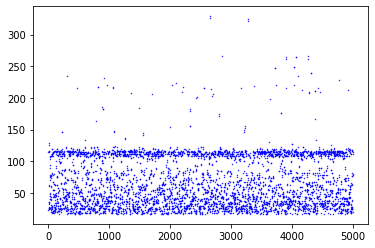

In [3]:
plt.scatter(range(5000), ground_pulse[0, 0: 5000], s=0.2, c='b')
plt.show()

### 卷积神经网络

In [25]:
X2 = X1/np.max(X1)
X2.shape

(7317, 5000)

In [43]:
data = np.zeros((X2.shape[0],2, 50, 50))
data.shape,data.shape[1]

((7317, 2, 50, 50), 2)

In [49]:
for i in tqdm(range(data.shape[0])):
    for j in range(data.shape[1]):
        for k in range(data.shape[2]): 
            data[i, j, k] = X2[i, k * 50 : k * 50 + 50]
data


100%|████████████████████████████████████████████████████████████████████████████| 7317/7317 [00:01<00:00, 6621.62it/s]


array([[[[0.09236948, 0.45783133, 0.45783133, ..., 0.09236948,
          0.08032129, 0.1124498 ],
         [0.12449799, 0.10843373, 0.1124498 , ..., 0.22088353,
          0.22088353, 0.17670683],
         [0.19277108, 0.08835341, 0.08032129, ..., 0.15261044,
          0.08032129, 0.08032129],
         ...,
         [0.13253012, 0.13253012, 0.14859438, ..., 0.08835341,
          0.08433735, 0.46586345],
         [0.12449799, 0.13253012, 0.37751004, ..., 0.4497992 ,
          0.14859438, 0.14056225],
         [0.22891566, 0.23293173, 0.26506024, ..., 0.11646586,
          0.26506024, 0.26104418]],

        [[0.09236948, 0.45783133, 0.45783133, ..., 0.09236948,
          0.08032129, 0.1124498 ],
         [0.12449799, 0.10843373, 0.1124498 , ..., 0.22088353,
          0.22088353, 0.17670683],
         [0.19277108, 0.08835341, 0.08032129, ..., 0.15261044,
          0.08032129, 0.08032129],
         ...,
         [0.13253012, 0.13253012, 0.14859438, ..., 0.08835341,
          0.08433735, 0.4

In [50]:
x_train = data[index[: 5000]]
y_train = Y2[index[: 5000]]
x_test = data[index[5000:]]
y_test = Y2[index[5000:]]

In [58]:
model = keras.Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=( 50, 50, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(4, activation='softmax'))


In [59]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy', 
             metrics=['accuracy'])

In [60]:
model.fit(x_train, y_train, batch_size=128, epochs=10)

ValueError: Error when checking input: expected conv2d_16_input to have shape (50, 50, 1) but got array with shape (2, 50, 50)